# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [2]:
#Loading data into dataframe

data = pd.read_csv("C:/Users/jeyad/OneDrive/Desktop/SAD project_group2/Phishing-URL-Detection-master/Phishing-URL-Detection-master/phishing.csv")
data.head()

Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  GoogleIndex  \
0           -1            -1               0        -1            1   
1            1            -1               1        -1            1   
2           -1            -1               1        -1            1   
3           -1            -1               0        -1            1   
4            1             1               1        -1            1   

   LinksPointingToPage  StatsReport  class  
0                    1            1     -1  
1                    0           -1     -1  
2                   -1            1     -1  
3                    1            1      1  
4                   -1           -1      1  

[5 rows x 32 columns]

## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

count      mean       std  min  25%  50%  75%  max
UsingIP              11054.0  0.313914  0.949495 -1.0 -1.0  1.0  1.0  1.0
LongURL              11054.0 -0.633345  0.765973 -1.0 -1.0 -1.0 -1.0  1.0
ShortURL             11054.0  0.738737  0.674024 -1.0  1.0  1.0  1.0  1.0
Symbol@              11054.0  0.700561  0.713625 -1.0  1.0  1.0  1.0  1.0
Redirecting//        11054.0  0.741632  0.670837 -1.0  1.0  1.0  1.0  1.0
PrefixSuffix-        11054.0 -0.734938  0.678165 -1.0 -1.0 -1.0 -1.0  1.0
SubDomains           11054.0  0.064049  0.817492 -1.0 -1.0  0.0  1.0  1.0
HTTPS                11054.0  0.251040  0.911856 -1.0 -1.0  1.0  1.0  1.0
DomainRegLen         11054.0 -0.336711  0.941651 -1.0 -1.0 -1.0  1.0  1.0
Favicon              11054.0  0.628551  0.777804 -1.0  1.0  1.0  1.0  1.0
NonStdPort           11054.0  0.728243  0.685350 -1.0  1.0  1.0  1.0  1.0
HTTPSDomainURL       11054.0  0.675231  0.737640 -1.0  1.0  1.0  1.0  1.0
RequestURL           11054.0  0.186720  0.982458 -1.0 -1.0  1.0  1.0  1.0
AnchorURL            11054.0 -0.076443  0.715116 -1.0 -1.0  0.0  0.0  1.0
LinksInScriptTags    11054.0 -0.118238  0.763933 -1.0 -1.0  0.0  0.0  1.0
ServerFormHandler    11054.0 -0.595712  0.759168 -1.0 -1.0 -1.0 -1.0  1.0
InfoEmail            11054.0  0.635788  0.771899 -1.0  1.0  1.0  1.0  1.0
AbnormalURL          11054.0  0.705446  0.708796 -1.0  1.0  1.0  1.0  1.0
WebsiteForwarding    11054.0  0.115705  0.319885  0.0  0.0  0.0  0.0  1.0
StatusBarCust        11054.0  0.762077  0.647516 -1.0  1.0  1.0  1.0  1.0
DisableRightClick    11054.0  0.913877  0.406009 -1.0  1.0  1.0  1.0  1.0
UsingPopupWindow     11054.0  0.613353  0.789845 -1.0  1.0  1.0  1.0  1.0
IframeRedirection    11054.0  0.816899  0.576807 -1.0  1.0  1.0  1.0  1.0
AgeofDomain          11054.0  0.061335  0.998162 -1.0 -1.0  1.0  1.0  1.0
DNSRecording         11054.0  0.377239  0.926158 -1.0 -1.0  1.0  1.0  1.0
WebsiteTraffic       11054.0  0.287407  0.827680 -1.0  0.0  1.0  1.0  1.0
PageRank             11054.0 -0.483626  0.875314 -1.0 -1.0 -1.0  1.0  1.0
GoogleIndex          11054.0  0.721549  0.692395 -1.0  1.0  1.0  1.0  1.0
LinksPointingToPage  11054.0  0.343948  0.569936 -1.0  0.0  0.0  1.0  1.0
StatsReport          11054.0  0.719739  0.694276 -1.0  1.0  1.0  1.0  1.0
class                11054.0  0.113986  0.993527 -1.0 -1.0  1.0  1.0  1.0

data_set.append(9 OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

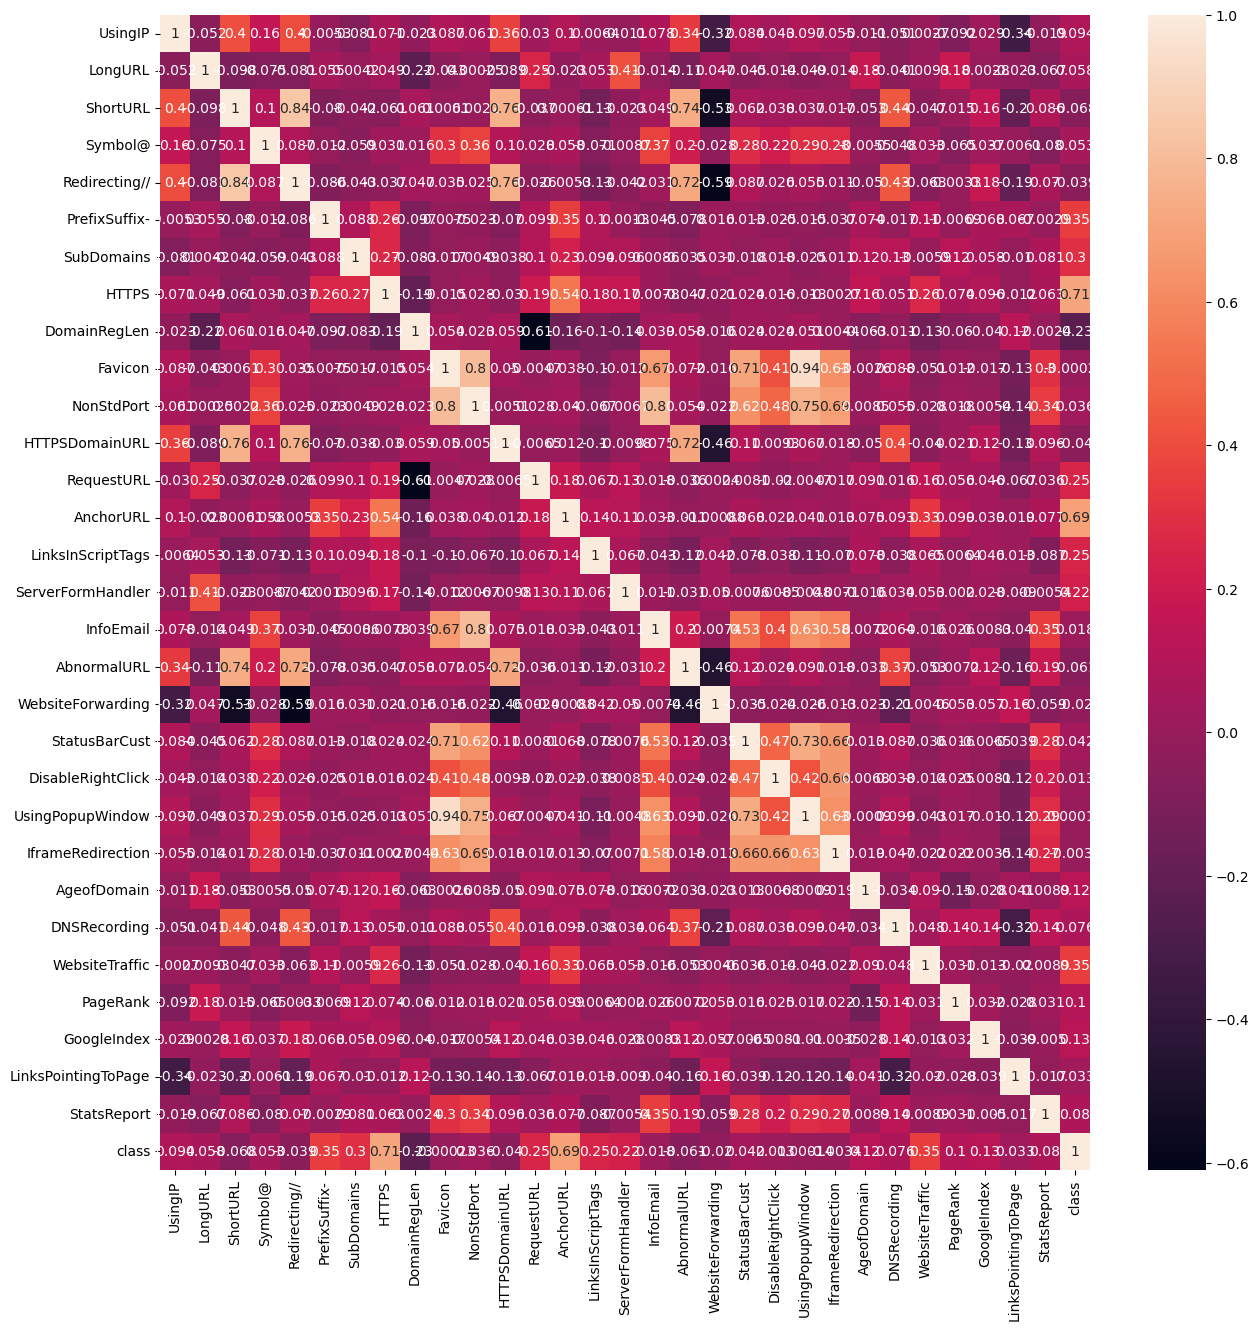

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

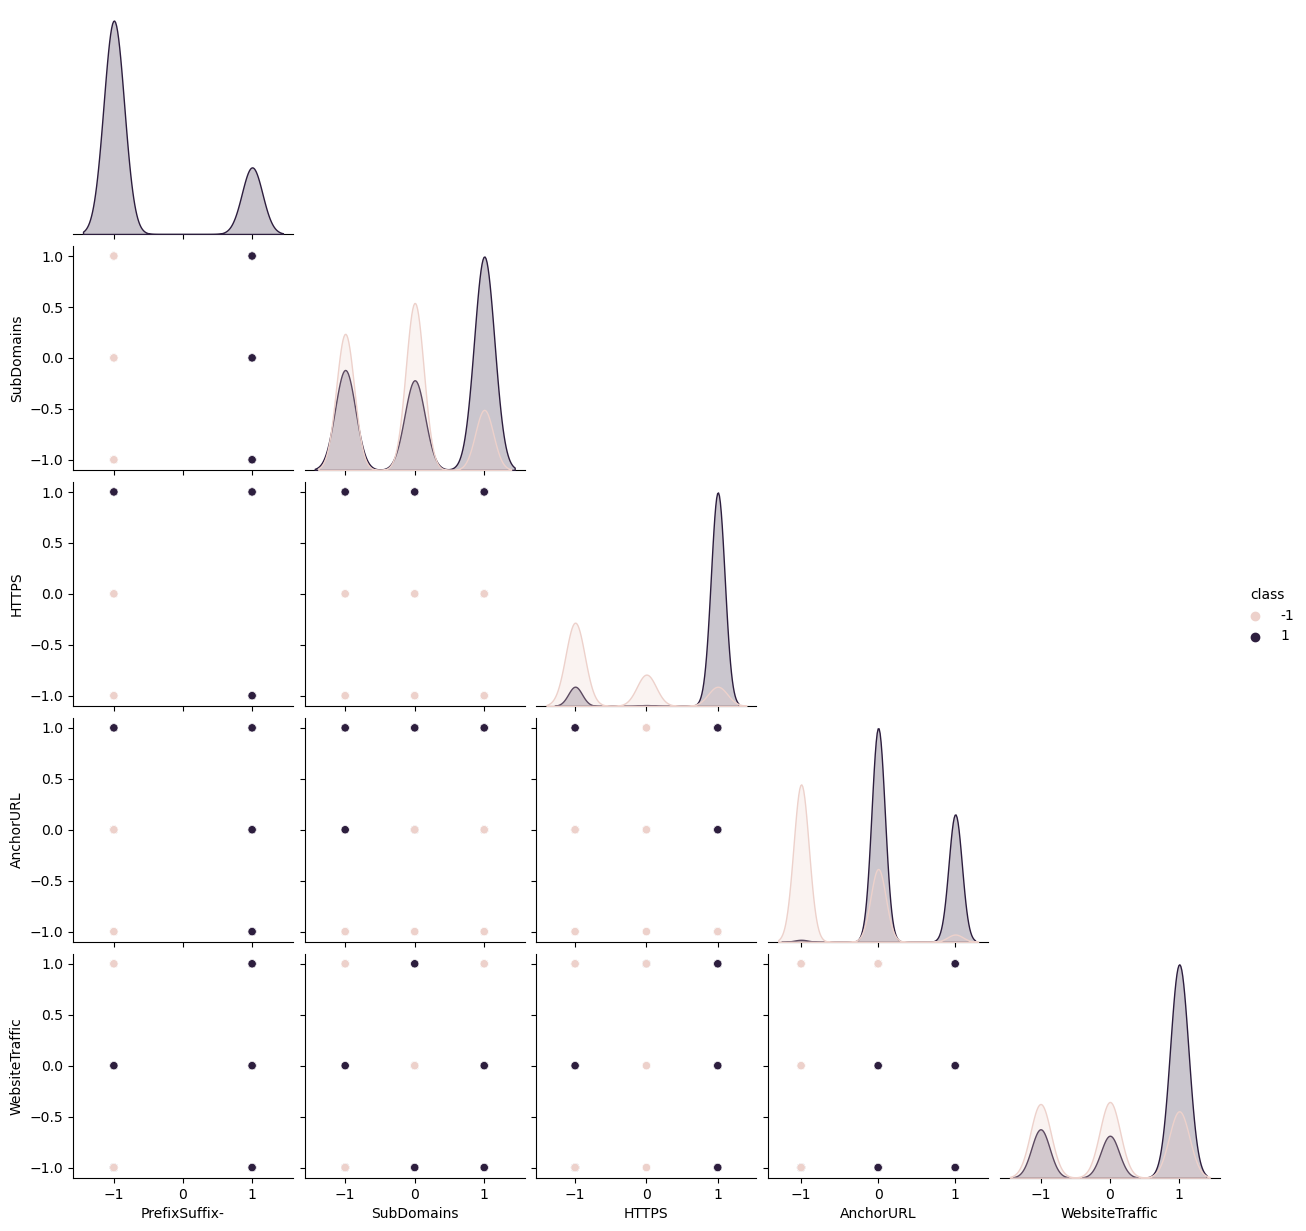

In [10]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


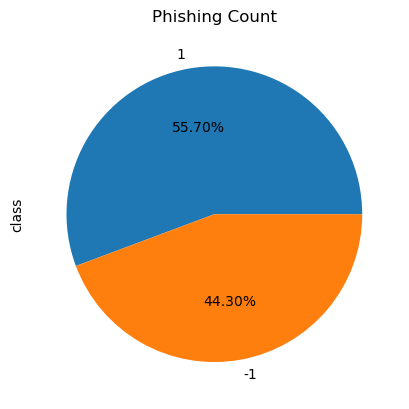

In [11]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [12]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [13]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [14]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [15]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [16]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [17]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [18]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [19]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [20]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [22]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [23]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



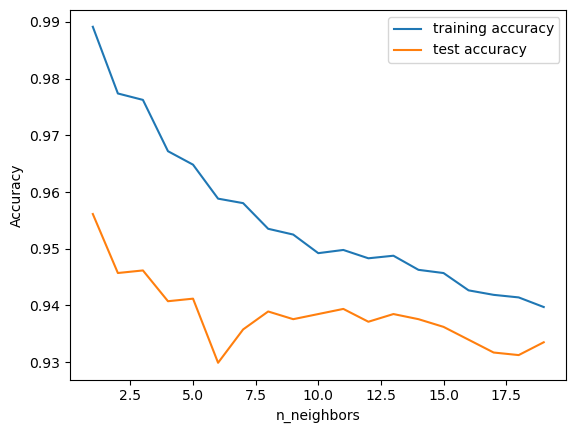

In [24]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [25]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [26]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [27]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [28]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [29]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [30]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [31]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [32]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [33]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [34]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [35]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [36]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [37]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [38]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.959

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.963

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.962

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.964


In [39]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



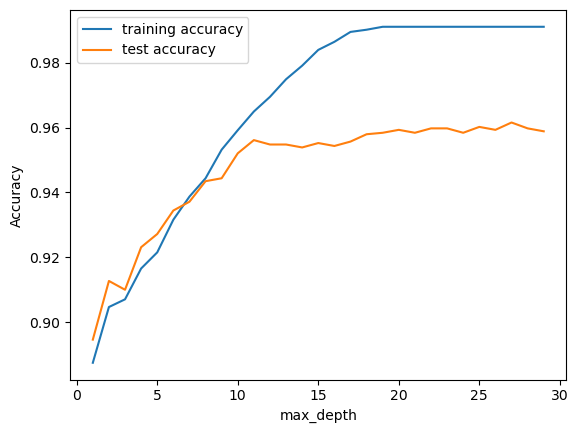

In [40]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [41]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [42]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [43]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [44]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.966

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.969

Random Forest : Recall on training Data: 0.992
Random Forest : Recall on test Data: 0.972

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.964


In [45]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211



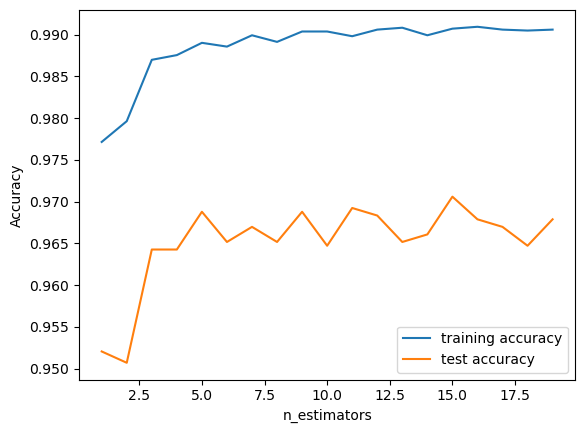

In [46]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [47]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [48]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [49]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [50]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [51]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



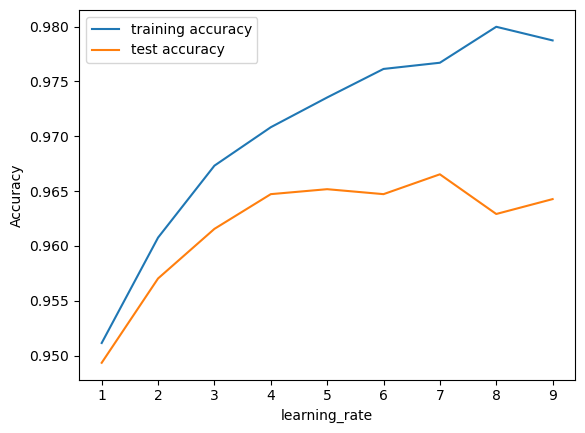

In [52]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

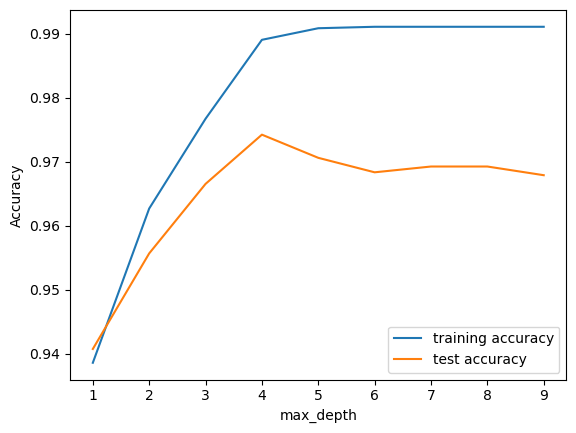

In [53]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [54]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [58]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5487232	total: 164ms	remaining: 2m 43s
1:	learn: 0.4349357	total: 167ms	remaining: 1m 23s
2:	learn: 0.3609236	total: 171ms	remaining: 56.8s
3:	learn: 0.3050829	total: 174ms	remaining: 43.4s
4:	learn: 0.2766620	total: 178ms	remaining: 35.4s
5:	learn: 0.2475476	total: 182ms	remaining: 30.1s
6:	learn: 0.2286637	total: 185ms	remaining: 26.3s
7:	learn: 0.2138754	total: 189ms	remaining: 23.4s
8:	learn: 0.2013643	total: 193ms	remaining: 21.3s
9:	learn: 0.1896378	total: 197ms	remaining: 19.5s
10:	learn: 0.1819539	total: 201ms	remaining: 18s
11:	learn: 0.1767867	total: 204ms	remaining: 16.8s
12:	learn: 0.1727735	total: 208ms	remaining: 15.8s
13:	learn: 0.1682578	total: 212ms	remaining: 14.9s
14:	learn: 0.1641759	total: 216ms	remaining: 14.2s
15:	learn: 0.1614218	total: 220ms	remaining: 13.5s
16:	learn: 0.1558968	total: 224ms	remaining: 13s
17:	learn: 0.1535881	total: 228ms	remaining: 12.4s
18:	learn: 0.1514228	total: 232ms	remaining: 12s
19:	learn: 0.1482580	total: 235ms	remaining: 

192:	learn: 0.0505900	total: 961ms	remaining: 4.02s
193:	learn: 0.0504426	total: 965ms	remaining: 4.01s
194:	learn: 0.0502767	total: 969ms	remaining: 4s
195:	learn: 0.0500644	total: 973ms	remaining: 3.99s
196:	learn: 0.0499431	total: 988ms	remaining: 4.03s
197:	learn: 0.0498418	total: 992ms	remaining: 4.02s
198:	learn: 0.0497734	total: 995ms	remaining: 4s
199:	learn: 0.0496759	total: 998ms	remaining: 3.99s
200:	learn: 0.0494923	total: 1s	remaining: 3.98s
201:	learn: 0.0493402	total: 1s	remaining: 3.97s
202:	learn: 0.0492795	total: 1.01s	remaining: 3.95s
203:	learn: 0.0489776	total: 1.01s	remaining: 3.94s
204:	learn: 0.0486491	total: 1.01s	remaining: 3.93s
205:	learn: 0.0484551	total: 1.02s	remaining: 3.92s
206:	learn: 0.0482768	total: 1.02s	remaining: 3.91s
207:	learn: 0.0481178	total: 1.02s	remaining: 3.9s
208:	learn: 0.0479317	total: 1.03s	remaining: 3.89s
209:	learn: 0.0476658	total: 1.03s	remaining: 3.88s
210:	learn: 0.0474069	total: 1.04s	remaining: 3.88s
211:	learn: 0.0471817	tot

389:	learn: 0.0327366	total: 1.78s	remaining: 2.78s
390:	learn: 0.0326258	total: 1.78s	remaining: 2.78s
391:	learn: 0.0326089	total: 1.79s	remaining: 2.78s
392:	learn: 0.0325731	total: 1.8s	remaining: 2.77s
393:	learn: 0.0325410	total: 1.8s	remaining: 2.77s
394:	learn: 0.0325172	total: 1.81s	remaining: 2.77s
395:	learn: 0.0324639	total: 1.81s	remaining: 2.77s
396:	learn: 0.0324274	total: 1.82s	remaining: 2.76s
397:	learn: 0.0323686	total: 1.82s	remaining: 2.76s
398:	learn: 0.0323451	total: 1.83s	remaining: 2.76s
399:	learn: 0.0323018	total: 1.83s	remaining: 2.75s
400:	learn: 0.0322754	total: 1.84s	remaining: 2.75s
401:	learn: 0.0322375	total: 1.84s	remaining: 2.74s
402:	learn: 0.0322034	total: 1.85s	remaining: 2.74s
403:	learn: 0.0321289	total: 1.85s	remaining: 2.73s
404:	learn: 0.0320859	total: 1.86s	remaining: 2.73s
405:	learn: 0.0320485	total: 1.86s	remaining: 2.72s
406:	learn: 0.0320104	total: 1.86s	remaining: 2.72s
407:	learn: 0.0319307	total: 1.87s	remaining: 2.71s
408:	learn: 0.

593:	learn: 0.0266143	total: 2.58s	remaining: 1.77s
594:	learn: 0.0266028	total: 2.59s	remaining: 1.76s
595:	learn: 0.0265914	total: 2.59s	remaining: 1.76s
596:	learn: 0.0265822	total: 2.6s	remaining: 1.75s
597:	learn: 0.0265820	total: 2.61s	remaining: 1.76s
598:	learn: 0.0265718	total: 2.62s	remaining: 1.75s
599:	learn: 0.0265678	total: 2.62s	remaining: 1.75s
600:	learn: 0.0265548	total: 2.62s	remaining: 1.74s
601:	learn: 0.0265547	total: 2.63s	remaining: 1.74s
602:	learn: 0.0265386	total: 2.63s	remaining: 1.73s
603:	learn: 0.0265146	total: 2.63s	remaining: 1.73s
604:	learn: 0.0264929	total: 2.64s	remaining: 1.72s
605:	learn: 0.0264716	total: 2.64s	remaining: 1.72s
606:	learn: 0.0264715	total: 2.64s	remaining: 1.71s
607:	learn: 0.0264555	total: 2.65s	remaining: 1.71s
608:	learn: 0.0264403	total: 2.65s	remaining: 1.7s
609:	learn: 0.0264234	total: 2.65s	remaining: 1.7s
610:	learn: 0.0264234	total: 2.66s	remaining: 1.69s
611:	learn: 0.0264233	total: 2.66s	remaining: 1.69s
612:	learn: 0.0

759:	learn: 0.0249566	total: 3.19s	remaining: 1.01s
760:	learn: 0.0249566	total: 3.19s	remaining: 1s
761:	learn: 0.0249565	total: 3.2s	remaining: 998ms
762:	learn: 0.0249565	total: 3.2s	remaining: 994ms
763:	learn: 0.0249565	total: 3.2s	remaining: 990ms
764:	learn: 0.0249564	total: 3.21s	remaining: 985ms
765:	learn: 0.0249564	total: 3.21s	remaining: 981ms
766:	learn: 0.0249564	total: 3.21s	remaining: 976ms
767:	learn: 0.0249562	total: 3.22s	remaining: 972ms
768:	learn: 0.0249562	total: 3.23s	remaining: 972ms
769:	learn: 0.0249562	total: 3.24s	remaining: 967ms
770:	learn: 0.0249561	total: 3.24s	remaining: 963ms
771:	learn: 0.0249375	total: 3.24s	remaining: 958ms
772:	learn: 0.0249374	total: 3.25s	remaining: 953ms
773:	learn: 0.0249374	total: 3.25s	remaining: 949ms
774:	learn: 0.0249343	total: 3.25s	remaining: 944ms
775:	learn: 0.0249343	total: 3.25s	remaining: 939ms
776:	learn: 0.0249343	total: 3.26s	remaining: 935ms
777:	learn: 0.0249343	total: 3.26s	remaining: 930ms
778:	learn: 0.0249

942:	learn: 0.0246896	total: 3.78s	remaining: 229ms
943:	learn: 0.0246896	total: 3.79s	remaining: 225ms
944:	learn: 0.0246896	total: 3.79s	remaining: 220ms
945:	learn: 0.0246896	total: 3.79s	remaining: 216ms
946:	learn: 0.0246896	total: 3.79s	remaining: 212ms
947:	learn: 0.0246896	total: 3.8s	remaining: 208ms
948:	learn: 0.0246896	total: 3.8s	remaining: 204ms
949:	learn: 0.0246896	total: 3.81s	remaining: 200ms
950:	learn: 0.0246896	total: 3.81s	remaining: 196ms
951:	learn: 0.0246895	total: 3.81s	remaining: 192ms
952:	learn: 0.0246895	total: 3.82s	remaining: 188ms
953:	learn: 0.0246894	total: 3.82s	remaining: 184ms
954:	learn: 0.0246894	total: 3.82s	remaining: 180ms
955:	learn: 0.0246894	total: 3.83s	remaining: 176ms
956:	learn: 0.0246893	total: 3.83s	remaining: 172ms
957:	learn: 0.0246893	total: 3.83s	remaining: 168ms
958:	learn: 0.0246893	total: 3.84s	remaining: 164ms
959:	learn: 0.0246893	total: 3.84s	remaining: 160ms
960:	learn: 0.0246892	total: 3.84s	remaining: 156ms
961:	learn: 0.

In [59]:
# pip install catboost

In [60]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [61]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [62]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [63]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 3.67ms	remaining: 3.66s
1:	learn: 0.4349357	total: 7.94ms	remaining: 3.96s
2:	learn: 0.3609236	total: 11.4ms	remaining: 3.78s
3:	learn: 0.3050829	total: 14.6ms	remaining: 3.63s
4:	learn: 0.2766620	total: 19ms	remaining: 3.79s
5:	learn: 0.2475476	total: 22.2ms	remaining: 3.67s
6:	learn: 0.2286637	total: 25.2ms	remaining: 3.58s
7:	learn: 0.2138754	total: 28.8ms	remaining: 3.57s
8:	learn: 0.2013643	total: 33.2ms	remaining: 3.66s
9:	learn: 0.1896378	total: 36.4ms	remaining: 3.6s
10:	learn: 0.1819539	total: 39.7ms	remaining: 3.57s
11:	learn: 0.1767867	total: 43.1ms	remaining: 3.55s
12:	learn: 0.1727735	total: 46.2ms	remaining: 3.51s
13:	learn: 0.1682578	total: 50.8ms	remaining: 3.58s
14:	learn: 0.1641759	total: 54ms	remaining: 3.54s
15:	learn: 0.1614218	total: 57.3ms	remaining: 3.52s
16:	learn: 0.1558968	total: 60.7ms	remaining: 3.51s
17:	learn: 0.1535881	total: 65.4ms	remaining: 3.57s
18:	learn: 0.1514228	total: 68.9ms	remaining: 3.56s
19:	learn: 0.1482580	total:

202:	learn: 0.0492795	total: 832ms	remaining: 3.27s
203:	learn: 0.0489776	total: 837ms	remaining: 3.27s
204:	learn: 0.0486491	total: 842ms	remaining: 3.26s
205:	learn: 0.0484551	total: 847ms	remaining: 3.26s
206:	learn: 0.0482768	total: 851ms	remaining: 3.26s
207:	learn: 0.0481178	total: 857ms	remaining: 3.26s
208:	learn: 0.0479317	total: 861ms	remaining: 3.26s
209:	learn: 0.0476658	total: 865ms	remaining: 3.25s
210:	learn: 0.0474069	total: 869ms	remaining: 3.25s
211:	learn: 0.0471817	total: 873ms	remaining: 3.24s
212:	learn: 0.0470479	total: 878ms	remaining: 3.24s
213:	learn: 0.0469487	total: 882ms	remaining: 3.24s
214:	learn: 0.0468552	total: 893ms	remaining: 3.26s
215:	learn: 0.0466651	total: 897ms	remaining: 3.26s
216:	learn: 0.0465418	total: 901ms	remaining: 3.25s
217:	learn: 0.0464800	total: 905ms	remaining: 3.25s
218:	learn: 0.0463546	total: 909ms	remaining: 3.24s
219:	learn: 0.0461314	total: 913ms	remaining: 3.23s
220:	learn: 0.0460039	total: 916ms	remaining: 3.23s
221:	learn: 

397:	learn: 0.0323686	total: 1.64s	remaining: 2.47s
398:	learn: 0.0323451	total: 1.64s	remaining: 2.47s
399:	learn: 0.0323018	total: 1.65s	remaining: 2.47s
400:	learn: 0.0322754	total: 1.65s	remaining: 2.46s
401:	learn: 0.0322375	total: 1.66s	remaining: 2.46s
402:	learn: 0.0322034	total: 1.66s	remaining: 2.46s
403:	learn: 0.0321289	total: 1.67s	remaining: 2.46s
404:	learn: 0.0320859	total: 1.67s	remaining: 2.46s
405:	learn: 0.0320485	total: 1.68s	remaining: 2.45s
406:	learn: 0.0320104	total: 1.68s	remaining: 2.45s
407:	learn: 0.0319307	total: 1.69s	remaining: 2.45s
408:	learn: 0.0318545	total: 1.69s	remaining: 2.44s
409:	learn: 0.0317902	total: 1.7s	remaining: 2.44s
410:	learn: 0.0317538	total: 1.7s	remaining: 2.44s
411:	learn: 0.0316677	total: 1.7s	remaining: 2.43s
412:	learn: 0.0316340	total: 1.71s	remaining: 2.43s
413:	learn: 0.0316212	total: 1.71s	remaining: 2.42s
414:	learn: 0.0315865	total: 1.71s	remaining: 2.42s
415:	learn: 0.0315026	total: 1.72s	remaining: 2.41s
416:	learn: 0.0

605:	learn: 0.0264716	total: 2.42s	remaining: 1.57s
606:	learn: 0.0264715	total: 2.43s	remaining: 1.57s
607:	learn: 0.0264555	total: 2.43s	remaining: 1.57s
608:	learn: 0.0264403	total: 2.44s	remaining: 1.56s
609:	learn: 0.0264234	total: 2.44s	remaining: 1.56s
610:	learn: 0.0264234	total: 2.44s	remaining: 1.56s
611:	learn: 0.0264233	total: 2.45s	remaining: 1.55s
612:	learn: 0.0264233	total: 2.45s	remaining: 1.55s
613:	learn: 0.0264210	total: 2.45s	remaining: 1.54s
614:	learn: 0.0264003	total: 2.46s	remaining: 1.54s
615:	learn: 0.0264003	total: 2.46s	remaining: 1.53s
616:	learn: 0.0263794	total: 2.46s	remaining: 1.53s
617:	learn: 0.0263627	total: 2.47s	remaining: 1.52s
618:	learn: 0.0263594	total: 2.47s	remaining: 1.52s
619:	learn: 0.0263505	total: 2.47s	remaining: 1.52s
620:	learn: 0.0263275	total: 2.48s	remaining: 1.51s
621:	learn: 0.0263104	total: 2.48s	remaining: 1.51s
622:	learn: 0.0262977	total: 2.48s	remaining: 1.5s
623:	learn: 0.0262934	total: 2.49s	remaining: 1.5s
624:	learn: 0.

779:	learn: 0.0249233	total: 3.03s	remaining: 855ms
780:	learn: 0.0249233	total: 3.03s	remaining: 851ms
781:	learn: 0.0249232	total: 3.04s	remaining: 847ms
782:	learn: 0.0249232	total: 3.04s	remaining: 843ms
783:	learn: 0.0249231	total: 3.05s	remaining: 839ms
784:	learn: 0.0249231	total: 3.05s	remaining: 835ms
785:	learn: 0.0249232	total: 3.05s	remaining: 831ms
786:	learn: 0.0249231	total: 3.06s	remaining: 827ms
787:	learn: 0.0249231	total: 3.06s	remaining: 823ms
788:	learn: 0.0249230	total: 3.06s	remaining: 819ms
789:	learn: 0.0249230	total: 3.06s	remaining: 815ms
790:	learn: 0.0249230	total: 3.07s	remaining: 811ms
791:	learn: 0.0249230	total: 3.07s	remaining: 807ms
792:	learn: 0.0249107	total: 3.08s	remaining: 803ms
793:	learn: 0.0249107	total: 3.08s	remaining: 799ms
794:	learn: 0.0249106	total: 3.08s	remaining: 794ms
795:	learn: 0.0249105	total: 3.08s	remaining: 790ms
796:	learn: 0.0249105	total: 3.09s	remaining: 786ms
797:	learn: 0.0249106	total: 3.09s	remaining: 782ms
798:	learn: 

957:	learn: 0.0246893	total: 3.62s	remaining: 159ms
958:	learn: 0.0246893	total: 3.62s	remaining: 155ms
959:	learn: 0.0246893	total: 3.63s	remaining: 151ms
960:	learn: 0.0246892	total: 3.63s	remaining: 147ms
961:	learn: 0.0246892	total: 3.63s	remaining: 143ms
962:	learn: 0.0246892	total: 3.63s	remaining: 140ms
963:	learn: 0.0246891	total: 3.64s	remaining: 136ms
964:	learn: 0.0246891	total: 3.65s	remaining: 132ms
965:	learn: 0.0246891	total: 3.65s	remaining: 129ms
966:	learn: 0.0246891	total: 3.66s	remaining: 125ms
967:	learn: 0.0246890	total: 3.66s	remaining: 121ms
968:	learn: 0.0246890	total: 3.66s	remaining: 117ms
969:	learn: 0.0246891	total: 3.67s	remaining: 113ms
970:	learn: 0.0246890	total: 3.67s	remaining: 110ms
971:	learn: 0.0246890	total: 3.67s	remaining: 106ms
972:	learn: 0.0246632	total: 3.67s	remaining: 102ms
973:	learn: 0.0246367	total: 3.68s	remaining: 98.2ms
974:	learn: 0.0246246	total: 3.68s	remaining: 94.4ms
975:	learn: 0.0246131	total: 3.69s	remaining: 90.6ms
976:	lear

158:	learn: 0.0368628	total: 619ms	remaining: 3.27s
159:	learn: 0.0367492	total: 624ms	remaining: 3.28s
160:	learn: 0.0366550	total: 629ms	remaining: 3.28s
161:	learn: 0.0364480	total: 634ms	remaining: 3.28s
162:	learn: 0.0362122	total: 640ms	remaining: 3.28s
163:	learn: 0.0360912	total: 644ms	remaining: 3.29s
164:	learn: 0.0359155	total: 649ms	remaining: 3.29s
165:	learn: 0.0358507	total: 655ms	remaining: 3.29s
166:	learn: 0.0356109	total: 660ms	remaining: 3.29s
167:	learn: 0.0354942	total: 664ms	remaining: 3.29s
168:	learn: 0.0353930	total: 669ms	remaining: 3.29s
169:	learn: 0.0353238	total: 674ms	remaining: 3.29s
170:	learn: 0.0352305	total: 678ms	remaining: 3.29s
171:	learn: 0.0351304	total: 683ms	remaining: 3.29s
172:	learn: 0.0350573	total: 687ms	remaining: 3.29s
173:	learn: 0.0349903	total: 692ms	remaining: 3.29s
174:	learn: 0.0348229	total: 697ms	remaining: 3.28s
175:	learn: 0.0347567	total: 701ms	remaining: 3.28s
176:	learn: 0.0347045	total: 705ms	remaining: 3.28s
177:	learn: 

357:	learn: 0.0253721	total: 1.41s	remaining: 2.53s
358:	learn: 0.0253720	total: 1.41s	remaining: 2.52s
359:	learn: 0.0253545	total: 1.42s	remaining: 2.52s
360:	learn: 0.0253507	total: 1.42s	remaining: 2.51s
361:	learn: 0.0253507	total: 1.42s	remaining: 2.51s
362:	learn: 0.0253313	total: 1.43s	remaining: 2.51s
363:	learn: 0.0252683	total: 1.44s	remaining: 2.51s
364:	learn: 0.0252043	total: 1.44s	remaining: 2.5s
365:	learn: 0.0252042	total: 1.44s	remaining: 2.5s
366:	learn: 0.0252042	total: 1.45s	remaining: 2.5s
367:	learn: 0.0252041	total: 1.45s	remaining: 2.49s
368:	learn: 0.0252036	total: 1.45s	remaining: 2.48s
369:	learn: 0.0251971	total: 1.46s	remaining: 2.48s
370:	learn: 0.0251696	total: 1.46s	remaining: 2.48s
371:	learn: 0.0251414	total: 1.46s	remaining: 2.47s
372:	learn: 0.0251410	total: 1.47s	remaining: 2.47s
373:	learn: 0.0251153	total: 1.47s	remaining: 2.46s
374:	learn: 0.0250939	total: 1.48s	remaining: 2.46s
375:	learn: 0.0250541	total: 1.48s	remaining: 2.46s
376:	learn: 0.0

568:	learn: 0.0243278	total: 2.2s	remaining: 1.67s
569:	learn: 0.0243277	total: 2.2s	remaining: 1.66s
570:	learn: 0.0243275	total: 2.21s	remaining: 1.66s
571:	learn: 0.0243275	total: 2.21s	remaining: 1.65s
572:	learn: 0.0243276	total: 2.21s	remaining: 1.65s
573:	learn: 0.0243199	total: 2.22s	remaining: 1.65s
574:	learn: 0.0243198	total: 2.22s	remaining: 1.64s
575:	learn: 0.0243196	total: 2.22s	remaining: 1.64s
576:	learn: 0.0243180	total: 2.23s	remaining: 1.63s
577:	learn: 0.0243179	total: 2.23s	remaining: 1.63s
578:	learn: 0.0243176	total: 2.23s	remaining: 1.63s
579:	learn: 0.0243175	total: 2.24s	remaining: 1.62s
580:	learn: 0.0243173	total: 2.24s	remaining: 1.62s
581:	learn: 0.0243173	total: 2.25s	remaining: 1.61s
582:	learn: 0.0243170	total: 2.25s	remaining: 1.61s
583:	learn: 0.0243170	total: 2.25s	remaining: 1.6s
584:	learn: 0.0243169	total: 2.25s	remaining: 1.6s
585:	learn: 0.0243168	total: 2.26s	remaining: 1.59s
586:	learn: 0.0243164	total: 2.26s	remaining: 1.59s
587:	learn: 0.02

739:	learn: 0.0241319	total: 2.81s	remaining: 988ms
740:	learn: 0.0241318	total: 2.81s	remaining: 984ms
741:	learn: 0.0241318	total: 2.82s	remaining: 980ms
742:	learn: 0.0241315	total: 2.83s	remaining: 978ms
743:	learn: 0.0241314	total: 2.83s	remaining: 974ms
744:	learn: 0.0241314	total: 2.83s	remaining: 969ms
745:	learn: 0.0241314	total: 2.84s	remaining: 966ms
746:	learn: 0.0241313	total: 2.84s	remaining: 962ms
747:	learn: 0.0241313	total: 2.84s	remaining: 958ms
748:	learn: 0.0241312	total: 2.85s	remaining: 954ms
749:	learn: 0.0241312	total: 2.85s	remaining: 950ms
750:	learn: 0.0241312	total: 2.85s	remaining: 947ms
751:	learn: 0.0241311	total: 2.86s	remaining: 943ms
752:	learn: 0.0241311	total: 2.86s	remaining: 938ms
753:	learn: 0.0241310	total: 2.86s	remaining: 934ms
754:	learn: 0.0241309	total: 2.87s	remaining: 931ms
755:	learn: 0.0241309	total: 2.87s	remaining: 927ms
756:	learn: 0.0241309	total: 2.87s	remaining: 923ms
757:	learn: 0.0241309	total: 2.88s	remaining: 919ms
758:	learn: 

923:	learn: 0.0238349	total: 3.42s	remaining: 281ms
924:	learn: 0.0238350	total: 3.42s	remaining: 277ms
925:	learn: 0.0238349	total: 3.42s	remaining: 274ms
926:	learn: 0.0238348	total: 3.43s	remaining: 270ms
927:	learn: 0.0238349	total: 3.43s	remaining: 266ms
928:	learn: 0.0238348	total: 3.43s	remaining: 262ms
929:	learn: 0.0238348	total: 3.44s	remaining: 259ms
930:	learn: 0.0238348	total: 3.44s	remaining: 255ms
931:	learn: 0.0238348	total: 3.44s	remaining: 251ms
932:	learn: 0.0238348	total: 3.44s	remaining: 247ms
933:	learn: 0.0238348	total: 3.45s	remaining: 244ms
934:	learn: 0.0238347	total: 3.45s	remaining: 240ms
935:	learn: 0.0238347	total: 3.45s	remaining: 236ms
936:	learn: 0.0238346	total: 3.46s	remaining: 232ms
937:	learn: 0.0238346	total: 3.46s	remaining: 229ms
938:	learn: 0.0238339	total: 3.46s	remaining: 225ms
939:	learn: 0.0238338	total: 3.46s	remaining: 221ms
940:	learn: 0.0238333	total: 3.47s	remaining: 217ms
941:	learn: 0.0238332	total: 3.47s	remaining: 214ms
942:	learn: 

110:	learn: 0.0360549	total: 482ms	remaining: 3.86s
111:	learn: 0.0356858	total: 486ms	remaining: 3.85s
112:	learn: 0.0354427	total: 490ms	remaining: 3.85s
113:	learn: 0.0352698	total: 495ms	remaining: 3.85s
114:	learn: 0.0351955	total: 500ms	remaining: 3.85s
115:	learn: 0.0350369	total: 506ms	remaining: 3.86s
116:	learn: 0.0348385	total: 511ms	remaining: 3.86s
117:	learn: 0.0346564	total: 516ms	remaining: 3.86s
118:	learn: 0.0344009	total: 522ms	remaining: 3.86s
119:	learn: 0.0342407	total: 527ms	remaining: 3.86s
120:	learn: 0.0340491	total: 532ms	remaining: 3.86s
121:	learn: 0.0339241	total: 537ms	remaining: 3.86s
122:	learn: 0.0336876	total: 542ms	remaining: 3.86s
123:	learn: 0.0335892	total: 546ms	remaining: 3.86s
124:	learn: 0.0334879	total: 551ms	remaining: 3.86s
125:	learn: 0.0332696	total: 557ms	remaining: 3.86s
126:	learn: 0.0330825	total: 562ms	remaining: 3.86s
127:	learn: 0.0329555	total: 567ms	remaining: 3.86s
128:	learn: 0.0327776	total: 572ms	remaining: 3.86s
129:	learn: 

289:	learn: 0.0244363	total: 1.3s	remaining: 3.19s
290:	learn: 0.0244363	total: 1.31s	remaining: 3.19s
291:	learn: 0.0244363	total: 1.31s	remaining: 3.18s
292:	learn: 0.0244363	total: 1.31s	remaining: 3.17s
293:	learn: 0.0244362	total: 1.31s	remaining: 3.16s
294:	learn: 0.0244361	total: 1.32s	remaining: 3.15s
295:	learn: 0.0244362	total: 1.32s	remaining: 3.14s
296:	learn: 0.0244361	total: 1.33s	remaining: 3.15s
297:	learn: 0.0244361	total: 1.33s	remaining: 3.14s
298:	learn: 0.0244362	total: 1.33s	remaining: 3.13s
299:	learn: 0.0244362	total: 1.34s	remaining: 3.12s
300:	learn: 0.0244362	total: 1.36s	remaining: 3.16s
301:	learn: 0.0244361	total: 1.36s	remaining: 3.15s
302:	learn: 0.0244361	total: 1.37s	remaining: 3.14s
303:	learn: 0.0244362	total: 1.37s	remaining: 3.13s
304:	learn: 0.0244361	total: 1.37s	remaining: 3.13s
305:	learn: 0.0244361	total: 1.38s	remaining: 3.12s
306:	learn: 0.0244361	total: 1.38s	remaining: 3.11s
307:	learn: 0.0244360	total: 1.38s	remaining: 3.1s
308:	learn: 0.

449:	learn: 0.0239625	total: 1.89s	remaining: 2.31s
450:	learn: 0.0239624	total: 1.89s	remaining: 2.31s
451:	learn: 0.0239619	total: 1.9s	remaining: 2.3s
452:	learn: 0.0239616	total: 1.9s	remaining: 2.3s
453:	learn: 0.0239617	total: 1.91s	remaining: 2.3s
454:	learn: 0.0239608	total: 1.91s	remaining: 2.29s
455:	learn: 0.0239296	total: 1.92s	remaining: 2.29s
456:	learn: 0.0239295	total: 1.92s	remaining: 2.28s
457:	learn: 0.0239294	total: 1.93s	remaining: 2.28s
458:	learn: 0.0239294	total: 1.93s	remaining: 2.28s
459:	learn: 0.0239293	total: 1.94s	remaining: 2.27s
460:	learn: 0.0239288	total: 1.94s	remaining: 2.27s
461:	learn: 0.0239287	total: 1.95s	remaining: 2.27s
462:	learn: 0.0239287	total: 1.95s	remaining: 2.26s
463:	learn: 0.0239285	total: 1.96s	remaining: 2.26s
464:	learn: 0.0239283	total: 1.96s	remaining: 2.26s
465:	learn: 0.0239283	total: 1.97s	remaining: 2.25s
466:	learn: 0.0239282	total: 1.97s	remaining: 2.25s
467:	learn: 0.0239281	total: 1.98s	remaining: 2.25s
468:	learn: 0.023

609:	learn: 0.0234332	total: 2.49s	remaining: 1.59s
610:	learn: 0.0234332	total: 2.5s	remaining: 1.59s
611:	learn: 0.0234331	total: 2.5s	remaining: 1.59s
612:	learn: 0.0234331	total: 2.51s	remaining: 1.58s
613:	learn: 0.0234330	total: 2.51s	remaining: 1.58s
614:	learn: 0.0234329	total: 2.51s	remaining: 1.57s
615:	learn: 0.0234329	total: 2.52s	remaining: 1.57s
616:	learn: 0.0234329	total: 2.52s	remaining: 1.56s
617:	learn: 0.0234329	total: 2.53s	remaining: 1.56s
618:	learn: 0.0234328	total: 2.53s	remaining: 1.56s
619:	learn: 0.0234328	total: 2.53s	remaining: 1.55s
620:	learn: 0.0234327	total: 2.54s	remaining: 1.55s
621:	learn: 0.0234326	total: 2.54s	remaining: 1.54s
622:	learn: 0.0234325	total: 2.54s	remaining: 1.54s
623:	learn: 0.0234324	total: 2.55s	remaining: 1.54s
624:	learn: 0.0234324	total: 2.55s	remaining: 1.53s
625:	learn: 0.0234324	total: 2.56s	remaining: 1.53s
626:	learn: 0.0234322	total: 2.56s	remaining: 1.52s
627:	learn: 0.0234323	total: 2.56s	remaining: 1.52s
628:	learn: 0.

823:	learn: 0.0231072	total: 3.29s	remaining: 703ms
824:	learn: 0.0231071	total: 3.3s	remaining: 700ms
825:	learn: 0.0231070	total: 3.3s	remaining: 695ms
826:	learn: 0.0231070	total: 3.31s	remaining: 692ms
827:	learn: 0.0231070	total: 3.31s	remaining: 688ms
828:	learn: 0.0231069	total: 3.31s	remaining: 684ms
829:	learn: 0.0231070	total: 3.32s	remaining: 680ms
830:	learn: 0.0231070	total: 3.32s	remaining: 676ms
831:	learn: 0.0231068	total: 3.33s	remaining: 672ms
832:	learn: 0.0231064	total: 3.33s	remaining: 668ms
833:	learn: 0.0231064	total: 3.33s	remaining: 663ms
834:	learn: 0.0231063	total: 3.34s	remaining: 659ms
835:	learn: 0.0231062	total: 3.34s	remaining: 655ms
836:	learn: 0.0231062	total: 3.34s	remaining: 651ms
837:	learn: 0.0231061	total: 3.35s	remaining: 647ms
838:	learn: 0.0231061	total: 3.35s	remaining: 643ms
839:	learn: 0.0231060	total: 3.35s	remaining: 639ms
840:	learn: 0.0231061	total: 3.36s	remaining: 635ms
841:	learn: 0.0231060	total: 3.36s	remaining: 631ms
842:	learn: 0.

19:	learn: 0.0869924	total: 80.4ms	remaining: 3.94s
20:	learn: 0.0854988	total: 85.3ms	remaining: 3.97s
21:	learn: 0.0835536	total: 90.8ms	remaining: 4.04s
22:	learn: 0.0813809	total: 95.7ms	remaining: 4.06s
23:	learn: 0.0780136	total: 101ms	remaining: 4.11s
24:	learn: 0.0755844	total: 105ms	remaining: 4.11s
25:	learn: 0.0745842	total: 110ms	remaining: 4.11s
26:	learn: 0.0727494	total: 114ms	remaining: 4.12s
27:	learn: 0.0701703	total: 118ms	remaining: 4.11s
28:	learn: 0.0684395	total: 123ms	remaining: 4.11s
29:	learn: 0.0670071	total: 127ms	remaining: 4.12s
30:	learn: 0.0658517	total: 131ms	remaining: 4.1s
31:	learn: 0.0647186	total: 135ms	remaining: 4.1s
32:	learn: 0.0627563	total: 140ms	remaining: 4.09s
33:	learn: 0.0618674	total: 144ms	remaining: 4.08s
34:	learn: 0.0605472	total: 148ms	remaining: 4.07s
35:	learn: 0.0592497	total: 152ms	remaining: 4.06s
36:	learn: 0.0582435	total: 156ms	remaining: 4.06s
37:	learn: 0.0571699	total: 160ms	remaining: 4.05s
38:	learn: 0.0562875	total: 1

184:	learn: 0.0244204	total: 903ms	remaining: 3.98s
185:	learn: 0.0243508	total: 907ms	remaining: 3.97s
186:	learn: 0.0243425	total: 911ms	remaining: 3.96s
187:	learn: 0.0243320	total: 915ms	remaining: 3.95s
188:	learn: 0.0242338	total: 920ms	remaining: 3.94s
189:	learn: 0.0242047	total: 924ms	remaining: 3.94s
190:	learn: 0.0242044	total: 928ms	remaining: 3.93s
191:	learn: 0.0242042	total: 934ms	remaining: 3.93s
192:	learn: 0.0242042	total: 938ms	remaining: 3.92s
193:	learn: 0.0242041	total: 941ms	remaining: 3.91s
194:	learn: 0.0241676	total: 945ms	remaining: 3.9s
195:	learn: 0.0241675	total: 950ms	remaining: 3.9s
196:	learn: 0.0241672	total: 953ms	remaining: 3.89s
197:	learn: 0.0241672	total: 957ms	remaining: 3.88s
198:	learn: 0.0241671	total: 961ms	remaining: 3.87s
199:	learn: 0.0241670	total: 966ms	remaining: 3.86s
200:	learn: 0.0241669	total: 969ms	remaining: 3.85s
201:	learn: 0.0241463	total: 973ms	remaining: 3.84s
202:	learn: 0.0241460	total: 976ms	remaining: 3.83s
203:	learn: 0.

369:	learn: 0.0223179	total: 1.72s	remaining: 2.92s
370:	learn: 0.0223178	total: 1.72s	remaining: 2.92s
371:	learn: 0.0223176	total: 1.73s	remaining: 2.92s
372:	learn: 0.0223175	total: 1.75s	remaining: 2.93s
373:	learn: 0.0223163	total: 1.75s	remaining: 2.93s
374:	learn: 0.0223080	total: 1.75s	remaining: 2.92s
375:	learn: 0.0223075	total: 1.76s	remaining: 2.92s
376:	learn: 0.0223074	total: 1.76s	remaining: 2.91s
377:	learn: 0.0223073	total: 1.77s	remaining: 2.91s
378:	learn: 0.0223073	total: 1.77s	remaining: 2.9s
379:	learn: 0.0223072	total: 1.77s	remaining: 2.9s
380:	learn: 0.0223071	total: 1.78s	remaining: 2.89s
381:	learn: 0.0223071	total: 1.78s	remaining: 2.88s
382:	learn: 0.0223067	total: 1.79s	remaining: 2.88s
383:	learn: 0.0223066	total: 1.79s	remaining: 2.88s
384:	learn: 0.0223063	total: 1.8s	remaining: 2.87s
385:	learn: 0.0223059	total: 1.8s	remaining: 2.87s
386:	learn: 0.0223058	total: 1.81s	remaining: 2.86s
387:	learn: 0.0223057	total: 1.81s	remaining: 2.86s
388:	learn: 0.02

556:	learn: 0.0222628	total: 2.51s	remaining: 2s
557:	learn: 0.0222627	total: 2.52s	remaining: 2s
558:	learn: 0.0222627	total: 2.52s	remaining: 1.99s
559:	learn: 0.0222626	total: 2.53s	remaining: 1.99s
560:	learn: 0.0222626	total: 2.53s	remaining: 1.98s
561:	learn: 0.0222626	total: 2.54s	remaining: 1.98s
562:	learn: 0.0222626	total: 2.54s	remaining: 1.97s
563:	learn: 0.0222625	total: 2.55s	remaining: 1.97s
564:	learn: 0.0222625	total: 2.55s	remaining: 1.97s
565:	learn: 0.0222624	total: 2.56s	remaining: 1.96s
566:	learn: 0.0222623	total: 2.56s	remaining: 1.96s
567:	learn: 0.0222622	total: 2.57s	remaining: 1.95s
568:	learn: 0.0222621	total: 2.57s	remaining: 1.95s
569:	learn: 0.0222620	total: 2.58s	remaining: 1.95s
570:	learn: 0.0222615	total: 2.58s	remaining: 1.94s
571:	learn: 0.0222615	total: 2.59s	remaining: 1.94s
572:	learn: 0.0222614	total: 2.59s	remaining: 1.93s
573:	learn: 0.0222614	total: 2.6s	remaining: 1.93s
574:	learn: 0.0222613	total: 2.61s	remaining: 1.93s
575:	learn: 0.02226

755:	learn: 0.0218393	total: 3.32s	remaining: 1.07s
756:	learn: 0.0218392	total: 3.32s	remaining: 1.07s
757:	learn: 0.0218392	total: 3.33s	remaining: 1.06s
758:	learn: 0.0218390	total: 3.33s	remaining: 1.06s
759:	learn: 0.0218390	total: 3.33s	remaining: 1.05s
760:	learn: 0.0218389	total: 3.35s	remaining: 1.05s
761:	learn: 0.0218379	total: 3.35s	remaining: 1.05s
762:	learn: 0.0218379	total: 3.36s	remaining: 1.04s
763:	learn: 0.0218377	total: 3.36s	remaining: 1.04s
764:	learn: 0.0218107	total: 3.37s	remaining: 1.03s
765:	learn: 0.0217602	total: 3.37s	remaining: 1.03s
766:	learn: 0.0217599	total: 3.37s	remaining: 1.02s
767:	learn: 0.0217598	total: 3.38s	remaining: 1.02s
768:	learn: 0.0217598	total: 3.38s	remaining: 1.01s
769:	learn: 0.0217598	total: 3.38s	remaining: 1.01s
770:	learn: 0.0217598	total: 3.39s	remaining: 1.01s
771:	learn: 0.0217597	total: 3.39s	remaining: 1s
772:	learn: 0.0217596	total: 3.39s	remaining: 997ms
773:	learn: 0.0217593	total: 3.4s	remaining: 992ms
774:	learn: 0.02

949:	learn: 0.0217321	total: 4.13s	remaining: 217ms
950:	learn: 0.0217321	total: 4.13s	remaining: 213ms
951:	learn: 0.0217320	total: 4.14s	remaining: 209ms
952:	learn: 0.0217320	total: 4.14s	remaining: 204ms
953:	learn: 0.0217320	total: 4.14s	remaining: 200ms
954:	learn: 0.0217319	total: 4.15s	remaining: 195ms
955:	learn: 0.0217319	total: 4.15s	remaining: 191ms
956:	learn: 0.0217318	total: 4.16s	remaining: 187ms
957:	learn: 0.0217318	total: 4.16s	remaining: 182ms
958:	learn: 0.0217311	total: 4.17s	remaining: 178ms
959:	learn: 0.0217309	total: 4.17s	remaining: 174ms
960:	learn: 0.0217310	total: 4.17s	remaining: 169ms
961:	learn: 0.0217309	total: 4.17s	remaining: 165ms
962:	learn: 0.0217308	total: 4.18s	remaining: 161ms
963:	learn: 0.0217309	total: 4.18s	remaining: 156ms
964:	learn: 0.0217308	total: 4.18s	remaining: 152ms
965:	learn: 0.0217306	total: 4.19s	remaining: 147ms
966:	learn: 0.0217307	total: 4.19s	remaining: 143ms
967:	learn: 0.0217306	total: 4.19s	remaining: 139ms
968:	learn: 

119:	learn: 0.0251376	total: 601ms	remaining: 4.41s
120:	learn: 0.0250671	total: 606ms	remaining: 4.4s
121:	learn: 0.0249955	total: 611ms	remaining: 4.39s
122:	learn: 0.0249665	total: 615ms	remaining: 4.38s
123:	learn: 0.0249660	total: 619ms	remaining: 4.37s
124:	learn: 0.0248862	total: 623ms	remaining: 4.36s
125:	learn: 0.0248714	total: 627ms	remaining: 4.35s
126:	learn: 0.0248013	total: 631ms	remaining: 4.34s
127:	learn: 0.0245862	total: 636ms	remaining: 4.33s
128:	learn: 0.0245860	total: 641ms	remaining: 4.33s
129:	learn: 0.0244692	total: 646ms	remaining: 4.32s
130:	learn: 0.0244052	total: 651ms	remaining: 4.32s
131:	learn: 0.0242396	total: 656ms	remaining: 4.31s
132:	learn: 0.0242016	total: 661ms	remaining: 4.31s
133:	learn: 0.0242014	total: 665ms	remaining: 4.3s
134:	learn: 0.0241903	total: 670ms	remaining: 4.29s
135:	learn: 0.0241646	total: 675ms	remaining: 4.29s
136:	learn: 0.0241141	total: 680ms	remaining: 4.28s
137:	learn: 0.0239643	total: 687ms	remaining: 4.29s
138:	learn: 0.

308:	learn: 0.0221165	total: 1.39s	remaining: 3.1s
309:	learn: 0.0221164	total: 1.39s	remaining: 3.1s
310:	learn: 0.0221164	total: 1.4s	remaining: 3.09s
311:	learn: 0.0221164	total: 1.4s	remaining: 3.09s
312:	learn: 0.0221162	total: 1.41s	remaining: 3.08s
313:	learn: 0.0221161	total: 1.41s	remaining: 3.08s
314:	learn: 0.0220876	total: 1.41s	remaining: 3.07s
315:	learn: 0.0220874	total: 1.42s	remaining: 3.07s
316:	learn: 0.0220875	total: 1.42s	remaining: 3.06s
317:	learn: 0.0220873	total: 1.42s	remaining: 3.06s
318:	learn: 0.0220869	total: 1.43s	remaining: 3.05s
319:	learn: 0.0220869	total: 1.43s	remaining: 3.04s
320:	learn: 0.0220869	total: 1.44s	remaining: 3.04s
321:	learn: 0.0220869	total: 1.44s	remaining: 3.03s
322:	learn: 0.0220867	total: 1.44s	remaining: 3.03s
323:	learn: 0.0220866	total: 1.45s	remaining: 3.02s
324:	learn: 0.0220865	total: 1.45s	remaining: 3.01s
325:	learn: 0.0220865	total: 1.46s	remaining: 3.01s
326:	learn: 0.0220864	total: 1.46s	remaining: 3s
327:	learn: 0.02208

470:	learn: 0.0216002	total: 1.96s	remaining: 2.21s
471:	learn: 0.0216001	total: 1.97s	remaining: 2.2s
472:	learn: 0.0216001	total: 1.97s	remaining: 2.2s
473:	learn: 0.0216001	total: 1.98s	remaining: 2.19s
474:	learn: 0.0216000	total: 1.98s	remaining: 2.19s
475:	learn: 0.0216000	total: 1.98s	remaining: 2.18s
476:	learn: 0.0215999	total: 1.99s	remaining: 2.18s
477:	learn: 0.0215999	total: 1.99s	remaining: 2.17s
478:	learn: 0.0215997	total: 1.99s	remaining: 2.17s
479:	learn: 0.0215997	total: 2s	remaining: 2.16s
480:	learn: 0.0215995	total: 2s	remaining: 2.16s
481:	learn: 0.0215993	total: 2s	remaining: 2.15s
482:	learn: 0.0215992	total: 2.01s	remaining: 2.15s
483:	learn: 0.0215990	total: 2.02s	remaining: 2.16s
484:	learn: 0.0215988	total: 2.03s	remaining: 2.15s
485:	learn: 0.0215988	total: 2.03s	remaining: 2.15s
486:	learn: 0.0215986	total: 2.04s	remaining: 2.15s
487:	learn: 0.0215985	total: 2.04s	remaining: 2.14s
488:	learn: 0.0215985	total: 2.04s	remaining: 2.14s
489:	learn: 0.0215984	t

629:	learn: 0.0214426	total: 2.56s	remaining: 1.5s
630:	learn: 0.0214425	total: 2.56s	remaining: 1.5s
631:	learn: 0.0214424	total: 2.56s	remaining: 1.49s
632:	learn: 0.0214423	total: 2.57s	remaining: 1.49s
633:	learn: 0.0214411	total: 2.57s	remaining: 1.48s
634:	learn: 0.0214410	total: 2.58s	remaining: 1.48s
635:	learn: 0.0214407	total: 2.58s	remaining: 1.48s
636:	learn: 0.0214407	total: 2.58s	remaining: 1.47s
637:	learn: 0.0214406	total: 2.6s	remaining: 1.48s
638:	learn: 0.0214405	total: 2.6s	remaining: 1.47s
639:	learn: 0.0214404	total: 2.61s	remaining: 1.47s
640:	learn: 0.0214403	total: 2.61s	remaining: 1.46s
641:	learn: 0.0214402	total: 2.61s	remaining: 1.46s
642:	learn: 0.0214402	total: 2.62s	remaining: 1.45s
643:	learn: 0.0214400	total: 2.62s	remaining: 1.45s
644:	learn: 0.0214400	total: 2.62s	remaining: 1.44s
645:	learn: 0.0214400	total: 2.63s	remaining: 1.44s
646:	learn: 0.0214400	total: 2.63s	remaining: 1.44s
647:	learn: 0.0214400	total: 2.63s	remaining: 1.43s
648:	learn: 0.02

838:	learn: 0.0214213	total: 3.35s	remaining: 644ms
839:	learn: 0.0214204	total: 3.36s	remaining: 640ms
840:	learn: 0.0214201	total: 3.36s	remaining: 635ms
841:	learn: 0.0214199	total: 3.36s	remaining: 631ms
842:	learn: 0.0214198	total: 3.37s	remaining: 627ms
843:	learn: 0.0214198	total: 3.37s	remaining: 623ms
844:	learn: 0.0214193	total: 3.38s	remaining: 619ms
845:	learn: 0.0214193	total: 3.38s	remaining: 615ms
846:	learn: 0.0214192	total: 3.38s	remaining: 611ms
847:	learn: 0.0214190	total: 3.39s	remaining: 607ms
848:	learn: 0.0214189	total: 3.39s	remaining: 603ms
849:	learn: 0.0214189	total: 3.39s	remaining: 599ms
850:	learn: 0.0214189	total: 3.4s	remaining: 595ms
851:	learn: 0.0214186	total: 3.4s	remaining: 590ms
852:	learn: 0.0214185	total: 3.4s	remaining: 586ms
853:	learn: 0.0214184	total: 3.41s	remaining: 582ms
854:	learn: 0.0214183	total: 3.41s	remaining: 578ms
855:	learn: 0.0214183	total: 3.41s	remaining: 574ms
856:	learn: 0.0214183	total: 3.42s	remaining: 570ms
857:	learn: 0.0

0:	learn: 0.2884124	total: 3.68ms	remaining: 3.68s
1:	learn: 0.1943718	total: 8.24ms	remaining: 4.11s
2:	learn: 0.1571102	total: 12.7ms	remaining: 4.24s
3:	learn: 0.1388216	total: 17.5ms	remaining: 4.37s
4:	learn: 0.1315963	total: 22.5ms	remaining: 4.47s
5:	learn: 0.1247865	total: 27.6ms	remaining: 4.58s
6:	learn: 0.1193000	total: 32.7ms	remaining: 4.64s
7:	learn: 0.1145325	total: 37ms	remaining: 4.59s
8:	learn: 0.1065576	total: 42.3ms	remaining: 4.66s
9:	learn: 0.1013120	total: 47.5ms	remaining: 4.71s
10:	learn: 0.0962953	total: 52.1ms	remaining: 4.69s
11:	learn: 0.0920299	total: 56.9ms	remaining: 4.68s
12:	learn: 0.0897807	total: 64.5ms	remaining: 4.9s
13:	learn: 0.0851586	total: 69ms	remaining: 4.86s
14:	learn: 0.0828951	total: 73.8ms	remaining: 4.85s
15:	learn: 0.0779793	total: 79.2ms	remaining: 4.87s
16:	learn: 0.0757320	total: 83.6ms	remaining: 4.84s
17:	learn: 0.0734070	total: 88.6ms	remaining: 4.83s
18:	learn: 0.0710779	total: 92.6ms	remaining: 4.78s
19:	learn: 0.0695709	total:

199:	learn: 0.0229305	total: 801ms	remaining: 3.2s
200:	learn: 0.0229303	total: 805ms	remaining: 3.2s
201:	learn: 0.0229301	total: 809ms	remaining: 3.2s
202:	learn: 0.0229301	total: 813ms	remaining: 3.19s
203:	learn: 0.0229298	total: 817ms	remaining: 3.19s
204:	learn: 0.0229292	total: 822ms	remaining: 3.19s
205:	learn: 0.0229287	total: 825ms	remaining: 3.18s
206:	learn: 0.0228692	total: 829ms	remaining: 3.17s
207:	learn: 0.0228687	total: 832ms	remaining: 3.17s
208:	learn: 0.0227962	total: 837ms	remaining: 3.17s
209:	learn: 0.0227961	total: 840ms	remaining: 3.16s
210:	learn: 0.0227375	total: 844ms	remaining: 3.16s
211:	learn: 0.0226900	total: 848ms	remaining: 3.15s
212:	learn: 0.0226358	total: 852ms	remaining: 3.15s
213:	learn: 0.0225855	total: 856ms	remaining: 3.14s
214:	learn: 0.0224806	total: 860ms	remaining: 3.14s
215:	learn: 0.0224805	total: 863ms	remaining: 3.13s
216:	learn: 0.0224805	total: 866ms	remaining: 3.13s
217:	learn: 0.0224805	total: 870ms	remaining: 3.12s
218:	learn: 0.0

413:	learn: 0.0209599	total: 1.59s	remaining: 2.25s
414:	learn: 0.0209599	total: 1.6s	remaining: 2.25s
415:	learn: 0.0209598	total: 1.6s	remaining: 2.25s
416:	learn: 0.0209597	total: 1.6s	remaining: 2.24s
417:	learn: 0.0209597	total: 1.61s	remaining: 2.24s
418:	learn: 0.0209597	total: 1.61s	remaining: 2.23s
419:	learn: 0.0209596	total: 1.61s	remaining: 2.23s
420:	learn: 0.0209596	total: 1.62s	remaining: 2.23s
421:	learn: 0.0209594	total: 1.62s	remaining: 2.22s
422:	learn: 0.0209593	total: 1.63s	remaining: 2.22s
423:	learn: 0.0209593	total: 1.63s	remaining: 2.21s
424:	learn: 0.0209591	total: 1.63s	remaining: 2.21s
425:	learn: 0.0209589	total: 1.64s	remaining: 2.21s
426:	learn: 0.0209589	total: 1.64s	remaining: 2.2s
427:	learn: 0.0209588	total: 1.64s	remaining: 2.2s
428:	learn: 0.0209587	total: 1.65s	remaining: 2.19s
429:	learn: 0.0209586	total: 1.65s	remaining: 2.19s
430:	learn: 0.0209586	total: 1.65s	remaining: 2.18s
431:	learn: 0.0209584	total: 1.66s	remaining: 2.18s
432:	learn: 0.020

572:	learn: 0.0209448	total: 2.19s	remaining: 1.63s
573:	learn: 0.0209447	total: 2.19s	remaining: 1.63s
574:	learn: 0.0209446	total: 2.19s	remaining: 1.62s
575:	learn: 0.0209446	total: 2.2s	remaining: 1.62s
576:	learn: 0.0209445	total: 2.2s	remaining: 1.61s
577:	learn: 0.0209444	total: 2.21s	remaining: 1.61s
578:	learn: 0.0209444	total: 2.21s	remaining: 1.61s
579:	learn: 0.0209443	total: 2.21s	remaining: 1.6s
580:	learn: 0.0209442	total: 2.22s	remaining: 1.6s
581:	learn: 0.0209442	total: 2.22s	remaining: 1.59s
582:	learn: 0.0209441	total: 2.22s	remaining: 1.59s
583:	learn: 0.0209439	total: 2.23s	remaining: 1.59s
584:	learn: 0.0209439	total: 2.23s	remaining: 1.58s
585:	learn: 0.0209439	total: 2.23s	remaining: 1.58s
586:	learn: 0.0209439	total: 2.24s	remaining: 1.57s
587:	learn: 0.0209438	total: 2.24s	remaining: 1.57s
588:	learn: 0.0209438	total: 2.25s	remaining: 1.57s
589:	learn: 0.0209431	total: 2.25s	remaining: 1.56s
590:	learn: 0.0209431	total: 2.25s	remaining: 1.56s
591:	learn: 0.02

744:	learn: 0.0209114	total: 2.79s	remaining: 954ms
745:	learn: 0.0209112	total: 2.79s	remaining: 951ms
746:	learn: 0.0209111	total: 2.79s	remaining: 947ms
747:	learn: 0.0209110	total: 2.8s	remaining: 943ms
748:	learn: 0.0209109	total: 2.8s	remaining: 939ms
749:	learn: 0.0209108	total: 2.81s	remaining: 936ms
750:	learn: 0.0209108	total: 2.81s	remaining: 932ms
751:	learn: 0.0209107	total: 2.81s	remaining: 928ms
752:	learn: 0.0209107	total: 2.82s	remaining: 924ms
753:	learn: 0.0209107	total: 2.82s	remaining: 920ms
754:	learn: 0.0209106	total: 2.82s	remaining: 917ms
755:	learn: 0.0209106	total: 2.83s	remaining: 913ms
756:	learn: 0.0209106	total: 2.83s	remaining: 909ms
757:	learn: 0.0209106	total: 2.83s	remaining: 905ms
758:	learn: 0.0209105	total: 2.84s	remaining: 901ms
759:	learn: 0.0209105	total: 2.84s	remaining: 897ms
760:	learn: 0.0209106	total: 2.84s	remaining: 893ms
761:	learn: 0.0209105	total: 2.85s	remaining: 890ms
762:	learn: 0.0209104	total: 2.85s	remaining: 887ms
763:	learn: 0.

905:	learn: 0.0209022	total: 3.38s	remaining: 351ms
906:	learn: 0.0209021	total: 3.38s	remaining: 347ms
907:	learn: 0.0209020	total: 3.38s	remaining: 343ms
908:	learn: 0.0209018	total: 3.39s	remaining: 339ms
909:	learn: 0.0209016	total: 3.39s	remaining: 336ms
910:	learn: 0.0209016	total: 3.4s	remaining: 332ms
911:	learn: 0.0209016	total: 3.4s	remaining: 328ms
912:	learn: 0.0209016	total: 3.4s	remaining: 324ms
913:	learn: 0.0209015	total: 3.41s	remaining: 321ms
914:	learn: 0.0209014	total: 3.41s	remaining: 317ms
915:	learn: 0.0209013	total: 3.42s	remaining: 313ms
916:	learn: 0.0209013	total: 3.42s	remaining: 309ms
917:	learn: 0.0209012	total: 3.42s	remaining: 306ms
918:	learn: 0.0209011	total: 3.43s	remaining: 302ms
919:	learn: 0.0209010	total: 3.43s	remaining: 298ms
920:	learn: 0.0209010	total: 3.43s	remaining: 294ms
921:	learn: 0.0209009	total: 3.44s	remaining: 291ms
922:	learn: 0.0209009	total: 3.44s	remaining: 287ms
923:	learn: 0.0209008	total: 3.44s	remaining: 283ms
924:	learn: 0.0

93:	learn: 0.0238103	total: 434ms	remaining: 4.18s
94:	learn: 0.0237448	total: 439ms	remaining: 4.18s
95:	learn: 0.0236226	total: 444ms	remaining: 4.18s
96:	learn: 0.0235262	total: 450ms	remaining: 4.19s
97:	learn: 0.0234859	total: 480ms	remaining: 4.42s
98:	learn: 0.0234215	total: 484ms	remaining: 4.41s
99:	learn: 0.0234199	total: 488ms	remaining: 4.39s
100:	learn: 0.0232797	total: 492ms	remaining: 4.38s
101:	learn: 0.0231192	total: 496ms	remaining: 4.37s
102:	learn: 0.0229499	total: 500ms	remaining: 4.36s
103:	learn: 0.0227822	total: 504ms	remaining: 4.34s
104:	learn: 0.0227820	total: 508ms	remaining: 4.33s
105:	learn: 0.0227205	total: 512ms	remaining: 4.32s
106:	learn: 0.0227204	total: 516ms	remaining: 4.3s
107:	learn: 0.0225895	total: 520ms	remaining: 4.29s
108:	learn: 0.0225187	total: 524ms	remaining: 4.28s
109:	learn: 0.0224258	total: 528ms	remaining: 4.27s
110:	learn: 0.0223557	total: 532ms	remaining: 4.26s
111:	learn: 0.0223553	total: 536ms	remaining: 4.25s
112:	learn: 0.022251

296:	learn: 0.0211901	total: 1.22s	remaining: 2.89s
297:	learn: 0.0211901	total: 1.23s	remaining: 2.89s
298:	learn: 0.0211900	total: 1.23s	remaining: 2.88s
299:	learn: 0.0211898	total: 1.23s	remaining: 2.88s
300:	learn: 0.0211898	total: 1.24s	remaining: 2.87s
301:	learn: 0.0211897	total: 1.24s	remaining: 2.87s
302:	learn: 0.0211896	total: 1.24s	remaining: 2.86s
303:	learn: 0.0211896	total: 1.25s	remaining: 2.85s
304:	learn: 0.0211896	total: 1.25s	remaining: 2.85s
305:	learn: 0.0211895	total: 1.25s	remaining: 2.84s
306:	learn: 0.0211893	total: 1.26s	remaining: 2.84s
307:	learn: 0.0211892	total: 1.26s	remaining: 2.83s
308:	learn: 0.0211891	total: 1.26s	remaining: 2.83s
309:	learn: 0.0211890	total: 1.27s	remaining: 2.82s
310:	learn: 0.0211886	total: 1.27s	remaining: 2.82s
311:	learn: 0.0211886	total: 1.27s	remaining: 2.81s
312:	learn: 0.0211885	total: 1.28s	remaining: 2.81s
313:	learn: 0.0211885	total: 1.28s	remaining: 2.8s
314:	learn: 0.0211880	total: 1.29s	remaining: 2.8s
315:	learn: 0.

462:	learn: 0.0210232	total: 1.81s	remaining: 2.1s
463:	learn: 0.0210231	total: 1.82s	remaining: 2.1s
464:	learn: 0.0210229	total: 1.82s	remaining: 2.09s
465:	learn: 0.0210228	total: 1.82s	remaining: 2.09s
466:	learn: 0.0210228	total: 1.84s	remaining: 2.1s
467:	learn: 0.0210228	total: 1.85s	remaining: 2.1s
468:	learn: 0.0210227	total: 1.85s	remaining: 2.09s
469:	learn: 0.0210227	total: 1.85s	remaining: 2.09s
470:	learn: 0.0210226	total: 1.86s	remaining: 2.09s
471:	learn: 0.0210226	total: 1.86s	remaining: 2.08s
472:	learn: 0.0209742	total: 1.87s	remaining: 2.08s
473:	learn: 0.0209469	total: 1.87s	remaining: 2.08s
474:	learn: 0.0209468	total: 1.88s	remaining: 2.07s
475:	learn: 0.0209468	total: 1.88s	remaining: 2.07s
476:	learn: 0.0209465	total: 1.88s	remaining: 2.06s
477:	learn: 0.0209464	total: 1.89s	remaining: 2.06s
478:	learn: 0.0209464	total: 1.89s	remaining: 2.06s
479:	learn: 0.0209464	total: 1.89s	remaining: 2.05s
480:	learn: 0.0209464	total: 1.9s	remaining: 2.05s
481:	learn: 0.020

621:	learn: 0.0209122	total: 2.44s	remaining: 1.48s
622:	learn: 0.0209122	total: 2.44s	remaining: 1.48s
623:	learn: 0.0209122	total: 2.44s	remaining: 1.47s
624:	learn: 0.0209122	total: 2.44s	remaining: 1.47s
625:	learn: 0.0209120	total: 2.45s	remaining: 1.46s
626:	learn: 0.0209119	total: 2.45s	remaining: 1.46s
627:	learn: 0.0209118	total: 2.46s	remaining: 1.45s
628:	learn: 0.0209118	total: 2.46s	remaining: 1.45s
629:	learn: 0.0209116	total: 2.46s	remaining: 1.45s
630:	learn: 0.0209117	total: 2.46s	remaining: 1.44s
631:	learn: 0.0209117	total: 2.47s	remaining: 1.44s
632:	learn: 0.0209115	total: 2.47s	remaining: 1.43s
633:	learn: 0.0209113	total: 2.48s	remaining: 1.43s
634:	learn: 0.0209111	total: 2.48s	remaining: 1.43s
635:	learn: 0.0209110	total: 2.48s	remaining: 1.42s
636:	learn: 0.0209109	total: 2.48s	remaining: 1.42s
637:	learn: 0.0209108	total: 2.49s	remaining: 1.41s
638:	learn: 0.0209105	total: 2.49s	remaining: 1.41s
639:	learn: 0.0209104	total: 2.5s	remaining: 1.4s
640:	learn: 0.

792:	learn: 0.0208946	total: 3.04s	remaining: 794ms
793:	learn: 0.0208945	total: 3.04s	remaining: 790ms
794:	learn: 0.0208944	total: 3.05s	remaining: 786ms
795:	learn: 0.0208942	total: 3.05s	remaining: 783ms
796:	learn: 0.0208942	total: 3.06s	remaining: 779ms
797:	learn: 0.0208942	total: 3.06s	remaining: 776ms
798:	learn: 0.0208933	total: 3.07s	remaining: 772ms
799:	learn: 0.0208930	total: 3.07s	remaining: 769ms
800:	learn: 0.0208926	total: 3.08s	remaining: 765ms
801:	learn: 0.0208926	total: 3.08s	remaining: 761ms
802:	learn: 0.0208925	total: 3.09s	remaining: 758ms
803:	learn: 0.0208924	total: 3.09s	remaining: 754ms
804:	learn: 0.0208923	total: 3.1s	remaining: 750ms
805:	learn: 0.0208923	total: 3.1s	remaining: 746ms
806:	learn: 0.0208922	total: 3.1s	remaining: 742ms
807:	learn: 0.0208922	total: 3.11s	remaining: 739ms
808:	learn: 0.0208921	total: 3.11s	remaining: 735ms
809:	learn: 0.0208917	total: 3.12s	remaining: 731ms
810:	learn: 0.0208917	total: 3.12s	remaining: 727ms
811:	learn: 0.0

952:	learn: 0.0208762	total: 3.64s	remaining: 180ms
953:	learn: 0.0208761	total: 3.65s	remaining: 176ms
954:	learn: 0.0208760	total: 3.65s	remaining: 172ms
955:	learn: 0.0208760	total: 3.66s	remaining: 168ms
956:	learn: 0.0208758	total: 3.66s	remaining: 164ms
957:	learn: 0.0208752	total: 3.67s	remaining: 161ms
958:	learn: 0.0208751	total: 3.67s	remaining: 157ms
959:	learn: 0.0208748	total: 3.67s	remaining: 153ms
960:	learn: 0.0208746	total: 3.67s	remaining: 149ms
961:	learn: 0.0208744	total: 3.68s	remaining: 145ms
962:	learn: 0.0208743	total: 3.68s	remaining: 142ms
963:	learn: 0.0208743	total: 3.69s	remaining: 138ms
964:	learn: 0.0208742	total: 3.69s	remaining: 134ms
965:	learn: 0.0208738	total: 3.69s	remaining: 130ms
966:	learn: 0.0208736	total: 3.7s	remaining: 126ms
967:	learn: 0.0208735	total: 3.7s	remaining: 122ms
968:	learn: 0.0208736	total: 3.71s	remaining: 119ms
969:	learn: 0.0208733	total: 3.71s	remaining: 115ms
970:	learn: 0.0208733	total: 3.71s	remaining: 111ms
971:	learn: 0.

125:	learn: 0.0216593	total: 611ms	remaining: 4.24s
126:	learn: 0.0216589	total: 615ms	remaining: 4.23s
127:	learn: 0.0216588	total: 619ms	remaining: 4.22s
128:	learn: 0.0216587	total: 623ms	remaining: 4.21s
129:	learn: 0.0216583	total: 627ms	remaining: 4.2s
130:	learn: 0.0216032	total: 632ms	remaining: 4.19s
131:	learn: 0.0216028	total: 636ms	remaining: 4.18s
132:	learn: 0.0216028	total: 639ms	remaining: 4.17s
133:	learn: 0.0216025	total: 643ms	remaining: 4.16s
134:	learn: 0.0216024	total: 647ms	remaining: 4.15s
135:	learn: 0.0216022	total: 651ms	remaining: 4.14s
136:	learn: 0.0216022	total: 655ms	remaining: 4.12s
137:	learn: 0.0216022	total: 658ms	remaining: 4.11s
138:	learn: 0.0216022	total: 661ms	remaining: 4.1s
139:	learn: 0.0216022	total: 665ms	remaining: 4.08s
140:	learn: 0.0216022	total: 668ms	remaining: 4.07s
141:	learn: 0.0216007	total: 672ms	remaining: 4.06s
142:	learn: 0.0216005	total: 676ms	remaining: 4.05s
143:	learn: 0.0216001	total: 680ms	remaining: 4.04s
144:	learn: 0.

329:	learn: 0.0211783	total: 1.4s	remaining: 2.84s
330:	learn: 0.0211780	total: 1.4s	remaining: 2.83s
331:	learn: 0.0211780	total: 1.4s	remaining: 2.83s
332:	learn: 0.0211778	total: 1.41s	remaining: 2.82s
333:	learn: 0.0211777	total: 1.41s	remaining: 2.82s
334:	learn: 0.0211777	total: 1.42s	remaining: 2.81s
335:	learn: 0.0211776	total: 1.42s	remaining: 2.81s
336:	learn: 0.0211773	total: 1.43s	remaining: 2.8s
337:	learn: 0.0211773	total: 1.44s	remaining: 2.82s
338:	learn: 0.0211771	total: 1.44s	remaining: 2.82s
339:	learn: 0.0211770	total: 1.45s	remaining: 2.81s
340:	learn: 0.0211769	total: 1.45s	remaining: 2.8s
341:	learn: 0.0211769	total: 1.45s	remaining: 2.8s
342:	learn: 0.0211766	total: 1.46s	remaining: 2.79s
343:	learn: 0.0211766	total: 1.46s	remaining: 2.79s
344:	learn: 0.0211766	total: 1.47s	remaining: 2.78s
345:	learn: 0.0211765	total: 1.47s	remaining: 2.78s
346:	learn: 0.0211764	total: 1.47s	remaining: 2.77s
347:	learn: 0.0211763	total: 1.48s	remaining: 2.77s
348:	learn: 0.0211

532:	learn: 0.0209978	total: 2.21s	remaining: 1.93s
533:	learn: 0.0209978	total: 2.21s	remaining: 1.93s
534:	learn: 0.0209976	total: 2.21s	remaining: 1.93s
535:	learn: 0.0209975	total: 2.22s	remaining: 1.92s
536:	learn: 0.0209972	total: 2.22s	remaining: 1.92s
537:	learn: 0.0209972	total: 2.23s	remaining: 1.91s
538:	learn: 0.0209971	total: 2.23s	remaining: 1.91s
539:	learn: 0.0209971	total: 2.23s	remaining: 1.9s
540:	learn: 0.0209969	total: 2.24s	remaining: 1.9s
541:	learn: 0.0209969	total: 2.24s	remaining: 1.89s
542:	learn: 0.0209967	total: 2.24s	remaining: 1.89s
543:	learn: 0.0209966	total: 2.25s	remaining: 1.88s
544:	learn: 0.0209963	total: 2.25s	remaining: 1.88s
545:	learn: 0.0209961	total: 2.25s	remaining: 1.88s
546:	learn: 0.0209960	total: 2.26s	remaining: 1.87s
547:	learn: 0.0209959	total: 2.26s	remaining: 1.86s
548:	learn: 0.0209958	total: 2.27s	remaining: 1.86s
549:	learn: 0.0209956	total: 2.27s	remaining: 1.86s
550:	learn: 0.0209954	total: 2.27s	remaining: 1.85s
551:	learn: 0.

733:	learn: 0.0209711	total: 3s	remaining: 1.09s
734:	learn: 0.0209710	total: 3s	remaining: 1.08s
735:	learn: 0.0209709	total: 3.01s	remaining: 1.08s
736:	learn: 0.0209709	total: 3.01s	remaining: 1.07s
737:	learn: 0.0209707	total: 3.02s	remaining: 1.07s
738:	learn: 0.0209704	total: 3.02s	remaining: 1.07s
739:	learn: 0.0209704	total: 3.02s	remaining: 1.06s
740:	learn: 0.0209703	total: 3.03s	remaining: 1.06s
741:	learn: 0.0209703	total: 3.03s	remaining: 1.05s
742:	learn: 0.0209703	total: 3.04s	remaining: 1.05s
743:	learn: 0.0209701	total: 3.04s	remaining: 1.05s
744:	learn: 0.0209700	total: 3.05s	remaining: 1.04s
745:	learn: 0.0209699	total: 3.05s	remaining: 1.04s
746:	learn: 0.0209699	total: 3.05s	remaining: 1.03s
747:	learn: 0.0209697	total: 3.06s	remaining: 1.03s
748:	learn: 0.0209697	total: 3.06s	remaining: 1.02s
749:	learn: 0.0209696	total: 3.06s	remaining: 1.02s
750:	learn: 0.0209696	total: 3.07s	remaining: 1.02s
751:	learn: 0.0209695	total: 3.07s	remaining: 1.01s
752:	learn: 0.0209

897:	learn: 0.0209546	total: 3.59s	remaining: 408ms
898:	learn: 0.0209545	total: 3.59s	remaining: 404ms
899:	learn: 0.0209545	total: 3.6s	remaining: 400ms
900:	learn: 0.0209545	total: 3.6s	remaining: 396ms
901:	learn: 0.0209544	total: 3.6s	remaining: 392ms
902:	learn: 0.0209542	total: 3.61s	remaining: 388ms
903:	learn: 0.0209542	total: 3.61s	remaining: 384ms
904:	learn: 0.0209540	total: 3.62s	remaining: 379ms
905:	learn: 0.0209539	total: 3.62s	remaining: 375ms
906:	learn: 0.0209538	total: 3.62s	remaining: 371ms
907:	learn: 0.0209538	total: 3.63s	remaining: 367ms
908:	learn: 0.0209537	total: 3.63s	remaining: 363ms
909:	learn: 0.0209536	total: 3.63s	remaining: 359ms
910:	learn: 0.0209535	total: 3.63s	remaining: 355ms
911:	learn: 0.0209535	total: 3.64s	remaining: 351ms
912:	learn: 0.0209534	total: 3.64s	remaining: 347ms
913:	learn: 0.0209533	total: 3.65s	remaining: 343ms
914:	learn: 0.0209533	total: 3.65s	remaining: 339ms
915:	learn: 0.0209533	total: 3.65s	remaining: 335ms
916:	learn: 0.0

98:	learn: 0.0226405	total: 410ms	remaining: 3.73s
99:	learn: 0.0226403	total: 414ms	remaining: 3.73s
100:	learn: 0.0226398	total: 418ms	remaining: 3.72s
101:	learn: 0.0226398	total: 422ms	remaining: 3.71s
102:	learn: 0.0226398	total: 425ms	remaining: 3.7s
103:	learn: 0.0226398	total: 430ms	remaining: 3.7s
104:	learn: 0.0226398	total: 438ms	remaining: 3.73s
105:	learn: 0.0226398	total: 444ms	remaining: 3.74s
106:	learn: 0.0226398	total: 450ms	remaining: 3.76s
107:	learn: 0.0226398	total: 454ms	remaining: 3.75s
108:	learn: 0.0226398	total: 458ms	remaining: 3.75s
109:	learn: 0.0226398	total: 462ms	remaining: 3.73s
110:	learn: 0.0226398	total: 465ms	remaining: 3.72s
111:	learn: 0.0226398	total: 468ms	remaining: 3.71s
112:	learn: 0.0226398	total: 472ms	remaining: 3.7s
113:	learn: 0.0226398	total: 475ms	remaining: 3.69s
114:	learn: 0.0226398	total: 479ms	remaining: 3.68s
115:	learn: 0.0226395	total: 482ms	remaining: 3.67s
116:	learn: 0.0226395	total: 485ms	remaining: 3.66s
117:	learn: 0.022

257:	learn: 0.0206614	total: 1s	remaining: 2.88s
258:	learn: 0.0206612	total: 1s	remaining: 2.87s
259:	learn: 0.0206611	total: 1.01s	remaining: 2.87s
260:	learn: 0.0206608	total: 1.01s	remaining: 2.87s
261:	learn: 0.0206605	total: 1.02s	remaining: 2.87s
262:	learn: 0.0206604	total: 1.02s	remaining: 2.86s
263:	learn: 0.0206603	total: 1.03s	remaining: 2.86s
264:	learn: 0.0206603	total: 1.03s	remaining: 2.86s
265:	learn: 0.0206600	total: 1.04s	remaining: 2.86s
266:	learn: 0.0206595	total: 1.04s	remaining: 2.86s
267:	learn: 0.0206595	total: 1.05s	remaining: 2.86s
268:	learn: 0.0206592	total: 1.05s	remaining: 2.85s
269:	learn: 0.0206590	total: 1.05s	remaining: 2.85s
270:	learn: 0.0206590	total: 1.06s	remaining: 2.85s
271:	learn: 0.0206585	total: 1.06s	remaining: 2.85s
272:	learn: 0.0206584	total: 1.07s	remaining: 2.85s
273:	learn: 0.0206580	total: 1.07s	remaining: 2.84s
274:	learn: 0.0206576	total: 1.08s	remaining: 2.84s
275:	learn: 0.0206575	total: 1.08s	remaining: 2.84s
276:	learn: 0.0206

445:	learn: 0.0205155	total: 1.79s	remaining: 2.22s
446:	learn: 0.0205155	total: 1.79s	remaining: 2.22s
447:	learn: 0.0205154	total: 1.8s	remaining: 2.22s
448:	learn: 0.0205154	total: 1.8s	remaining: 2.21s
449:	learn: 0.0205154	total: 1.81s	remaining: 2.21s
450:	learn: 0.0205153	total: 1.81s	remaining: 2.21s
451:	learn: 0.0205150	total: 1.82s	remaining: 2.2s
452:	learn: 0.0205148	total: 1.82s	remaining: 2.2s
453:	learn: 0.0205147	total: 1.83s	remaining: 2.2s
454:	learn: 0.0205146	total: 1.83s	remaining: 2.19s
455:	learn: 0.0205146	total: 1.84s	remaining: 2.19s
456:	learn: 0.0205143	total: 1.84s	remaining: 2.19s
457:	learn: 0.0205142	total: 1.85s	remaining: 2.18s
458:	learn: 0.0205140	total: 1.85s	remaining: 2.18s
459:	learn: 0.0205139	total: 1.86s	remaining: 2.18s
460:	learn: 0.0205138	total: 1.86s	remaining: 2.18s
461:	learn: 0.0205136	total: 1.86s	remaining: 2.17s
462:	learn: 0.0205132	total: 1.87s	remaining: 2.17s
463:	learn: 0.0205131	total: 1.88s	remaining: 2.17s
464:	learn: 0.020

621:	learn: 0.0202387	total: 2.63s	remaining: 1.6s
622:	learn: 0.0202384	total: 2.63s	remaining: 1.59s
623:	learn: 0.0202383	total: 2.63s	remaining: 1.59s
624:	learn: 0.0202382	total: 2.64s	remaining: 1.58s
625:	learn: 0.0202382	total: 2.64s	remaining: 1.58s
626:	learn: 0.0202381	total: 2.65s	remaining: 1.57s
627:	learn: 0.0202380	total: 2.65s	remaining: 1.57s
628:	learn: 0.0202380	total: 2.66s	remaining: 1.57s
629:	learn: 0.0202377	total: 2.66s	remaining: 1.56s
630:	learn: 0.0202375	total: 2.66s	remaining: 1.56s
631:	learn: 0.0202374	total: 2.67s	remaining: 1.55s
632:	learn: 0.0202374	total: 2.67s	remaining: 1.55s
633:	learn: 0.0202373	total: 2.67s	remaining: 1.54s
634:	learn: 0.0202372	total: 2.68s	remaining: 1.54s
635:	learn: 0.0202372	total: 2.68s	remaining: 1.53s
636:	learn: 0.0202372	total: 2.69s	remaining: 1.53s
637:	learn: 0.0202371	total: 2.69s	remaining: 1.53s
638:	learn: 0.0202371	total: 2.69s	remaining: 1.52s
639:	learn: 0.0202369	total: 2.7s	remaining: 1.52s
640:	learn: 0.

805:	learn: 0.0202111	total: 3.44s	remaining: 828ms
806:	learn: 0.0202111	total: 3.44s	remaining: 823ms
807:	learn: 0.0202111	total: 3.45s	remaining: 819ms
808:	learn: 0.0202108	total: 3.45s	remaining: 815ms
809:	learn: 0.0202107	total: 3.45s	remaining: 810ms
810:	learn: 0.0202107	total: 3.48s	remaining: 812ms
811:	learn: 0.0202106	total: 3.49s	remaining: 808ms
812:	learn: 0.0202104	total: 3.49s	remaining: 803ms
813:	learn: 0.0202104	total: 3.5s	remaining: 799ms
814:	learn: 0.0202103	total: 3.5s	remaining: 794ms
815:	learn: 0.0202103	total: 3.5s	remaining: 790ms
816:	learn: 0.0202101	total: 3.51s	remaining: 785ms
817:	learn: 0.0202100	total: 3.51s	remaining: 781ms
818:	learn: 0.0202098	total: 3.51s	remaining: 776ms
819:	learn: 0.0202096	total: 3.52s	remaining: 772ms
820:	learn: 0.0202095	total: 3.52s	remaining: 767ms
821:	learn: 0.0202095	total: 3.52s	remaining: 763ms
822:	learn: 0.0202095	total: 3.53s	remaining: 758ms
823:	learn: 0.0202094	total: 3.53s	remaining: 754ms
824:	learn: 0.0

996:	learn: 0.0201873	total: 4.22s	remaining: 12.7ms
997:	learn: 0.0201872	total: 4.23s	remaining: 8.47ms
998:	learn: 0.0201872	total: 4.23s	remaining: 4.23ms
999:	learn: 0.0201871	total: 4.23s	remaining: 0us


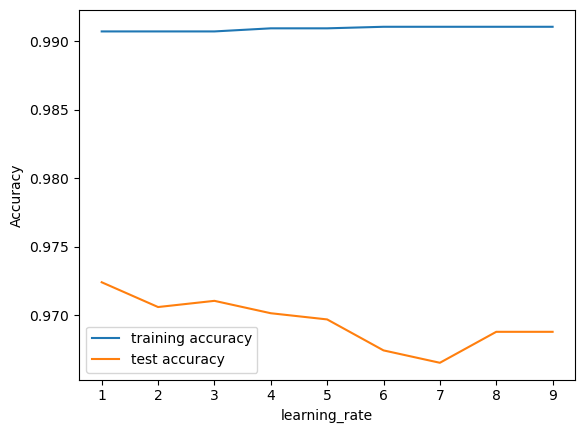

In [64]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [65]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [66]:
import xgboost as xgb
from sklearn import metrics

# Assuming y_train has values -1 and 1
# Convert -1 to 0
y_train[y_train == -1] = 0

# Specify objective as 'binary:logistic'
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predicting the target value from the model for the samples
y_train_xgb = xgb_model.predict(X_train)
y_test_xgb = xgb_model.predict(X_test)

# Computing the accuracy, f1_score, Recall, precision of the model performance
acc_train_xgb = metrics.accuracy_score(y_train, y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, y_test_xgb)
print("XGBoost Classifier: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train, y_train_xgb, average='micro')
f1_score_test_xgb = metrics.f1_score(y_test, y_test_xgb, average='micro')
print("XGBoost Classifier: F1 score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier: F1 score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train, y_train_xgb, average='micro')
recall_score_test_xgb = metrics.recall_score(y_test, y_test_xgb, average='micro')
print("XGBoost Classifier: Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier: Recall on test Data: {:.3f}".format(recall_score_test_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train, y_train_xgb, average='micro')
precision_score_test_xgb = metrics.precision_score(y_test, y_test_xgb, average='micro')
print("XGBoost Classifier: Precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier: Precision on test Data: {:.3f}".format(precision_score_test_xgb))

storeResults('XGBoost Classifier', acc_test_xgb, f1_score_test_xgb,
             recall_score_train_xgb, precision_score_train_xgb)


XGBoost Classifier: Accuracy on training Data: 0.987
XGBoost Classifier: Accuracy on test Data: 0.549

XGBoost Classifier: F1 score on training Data: 0.987
XGBoost Classifier: F1 score on test Data: 0.549

XGBoost Classifier: Recall on training Data: 0.987
XGBoost Classifier: Recall on test Data: 0.549

XGBoost Classifier: Precision on training Data: 0.987
XGBoost Classifier: Precision on test Data: 0.549


## 5.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [68]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [69]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [70]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train, y_train_mlp, average='micro')
f1_score_test_mlp = metrics.f1_score(y_test, y_test_mlp, average='micro')
print("Multi-layer Perceptron: F1 score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron: F1 score on test Data: {:.3f}".format(f1_score_test_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train, y_train_mlp, average='micro')
recall_score_test_mlp = metrics.recall_score(y_test, y_test_mlp, average='micro')
print("Multi-layer Perceptron: Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron: Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train, y_train_mlp, average='micro')
precision_score_test_mlp = metrics.precision_score(y_test, y_test_mlp, average='micro')
print("Multi-layer Perceptron: Precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron: Precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.987
Multi-layer Perceptron : Accuracy on test Data: 0.548

Multi-layer Perceptron: F1 score on training Data: 0.987
Multi-layer Perceptron: F1 score on test Data: 0.548

Multi-layer Perceptron: Recall on training Data: 0.987
Multi-layer Perceptron: Recall on test Data: 0.548

Multi-layer Perceptron: Precision on training Data: 0.987
Multi-layer Perceptron: Precision on test Data: 0.548


In [71]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [72]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [73]:
# dispalying total result
result

ML Model  Accuracy  f1_score  Recall  Precision
0           Logistic Regression     0.934     0.941   0.943      0.927
1           K-Nearest Neighbors     0.956     0.961   0.991      0.989
2        Support Vector Machine     0.964     0.968   0.980      0.965
3        Naive Bayes Classifier     0.605     0.454   0.292      0.997
4                 Decision Tree     0.959     0.963   0.991      0.993
5                 Random Forest     0.966     0.969   0.992      0.990
6  Gradient Boosting Classifier     0.974     0.977   0.994      0.986
7           CatBoost Classifier     0.972     0.975   0.994      0.989
8            XGBoost Classifier     0.549     0.549   0.987      0.987
9        Multi-layer Perceptron     0.548     0.548   0.987      0.987

In [74]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [75]:
# dispalying total result
sorted_result

ML Model  Accuracy  f1_score  Recall  Precision
0  Gradient Boosting Classifier     0.974     0.977   0.994      0.986
1           CatBoost Classifier     0.972     0.975   0.994      0.989
2                 Random Forest     0.966     0.969   0.992      0.990
3        Support Vector Machine     0.964     0.968   0.980      0.965
4                 Decision Tree     0.959     0.963   0.991      0.993
5           K-Nearest Neighbors     0.956     0.961   0.991      0.989
6           Logistic Regression     0.934     0.941   0.943      0.927
7        Naive Bayes Classifier     0.605     0.454   0.292      0.997
8            XGBoost Classifier     0.549     0.549   0.987      0.987
9        Multi-layer Perceptron     0.548     0.548   0.987      0.987

## Storing Best Model

In [76]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [77]:
import os
import pickle
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'pickle/' is the desired directory
output_directory = "C:/Users/jeyad/OneDrive/Desktop/SAD project_group2/Phishing-URL-Detection-master/Phishing-URL-Detection-master/pkl/"

os.makedirs(output_directory, exist_ok=True)

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

gbc.fit(X_train,y_train)

with open(os.path.join(output_directory, 'model1.pkl'), 'wb') as file:
    pickle.dump(gbc, file)

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.
